# Moralizing Self-Regulation Studies

## Nutrition Domain - Relational and Conceptual Primes

First load the packages we need

In [31]:
install.packages("wesanderson")

package 'wesanderson' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\joann\AppData\Local\Temp\Rtmpai3N5K\downloaded_packages


In [5]:
library(dplyr)
library(jtools)
library(tidyr)#for changing from long to wide//vice versa
library(ggpubr)
library(sjPlot)#for interactions
library(interactions)#for interaction plots
library(effects)
library(ggplot2)
library(lme4)
library(wesanderson)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'ggpubr' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'sjPlot' was built under R version 3.6.3"Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
Learn more about sjPlot with 'browseVignettes("sjPlot")'.
Warning message:
"package 'interactions' was built under R version 3.6.3"Warning message:
"package 'effects' was built under R version 3


Then read in the data - this notebook is in a different directory than our data, so we have to change our working directory.

"longDF" will be the dataframe with all participants' behavioral and self-report data; we're calling it "long" because there are ~120 rows of data *per* participant, with 50 participants in total

"wideDF" will be the dataframe with all participants' self-report data

In [4]:
setwd("F://Moralizing Self-Regulation//Nutrition//Nutrition Time Allocations//data//files")
longDF <- read.csv("Behavioral_Nutr.csv")
wideDF<- read.csv("QualtricsScored.csv")

In [5]:
longDF$ResponseFavor <- factor(longDF$ResponseFavor)
longDF$Domain <- factor(longDF$Domain)
longDF$TypeNameShown <- factor(longDF$TypeNameShown)
longDF$Condition <- factor(longDF$Condition)
longDF$PID <- factor(longDF$SANPID)

favor_test <- glmer(ResponseFavorCoded ~ TypeNameShown + (1|SANPID), data = longDF, family = binomial)
summary(favor_test)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ResponseFavorCoded ~ TypeNameShown + (1 | SANPID)
   Data: longDF

     AIC      BIC   logLik deviance df.resid 
  5818.5   5865.3  -2902.2   5804.5     5929 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.9530 -0.6980  0.0525  0.6990 12.0602 

Random effects:
 Groups Name        Variance Std.Dev.
 SANPID (Intercept) 7.352    2.711   
Number of obs: 5936, groups:  SANPID, 50

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -0.3038     0.3961  -0.767  0.44311    
TypeNameShownCelebWord       0.3122     0.1098   2.843  0.00447 ** 
TypeNameShownFriendName     -0.3141     0.1102  -2.849  0.00438 ** 
TypeNameShownFriendWord     -0.2760     0.1101  -2.508  0.01215 *  
TypeNameShownNutritionName   0.9241     0.1128   8.191  2.6e-16 ***
TypeNameShownNutritionWord   0.9544     0.1131   

In [6]:
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "CelebWord")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "CelebName")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "FriendWord")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "FriendName")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "NutritionWord")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "NutritionName")


favor_test <- glmer(ResponseFavorCoded ~ TypeNameShown + (1|SANPID), data = longDF, family = binomial)
summary(favor_test)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ResponseFavorCoded ~ TypeNameShown + (1 | SANPID)
   Data: longDF

     AIC      BIC   logLik deviance df.resid 
  5818.5   5865.3  -2902.2   5804.5     5929 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.9530 -0.6980  0.0525  0.6990 12.0603 

Random effects:
 Groups Name        Variance Std.Dev.
 SANPID (Intercept) 7.352    2.712   
Number of obs: 5936, groups:  SANPID, 50

Fixed effects:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  0.6203     0.3970   1.563    0.118    
TypeNameShownNutritionWord   0.0303     0.1154   0.263    0.793    
TypeNameShownFriendName     -1.2382     0.1137 -10.889  < 2e-16 ***
TypeNameShownFriendWord     -1.2001     0.1135 -10.572  < 2e-16 ***
TypeNameShownCelebName      -0.9241     0.1129  -8.189 2.63e-16 ***
TypeNameShownCelebWord      -0.6119     0.1128  -

ERROR: Error in effect_plot(model = favor_test, pred = TypeNameShown, x.label = "Name/Word Prime Presented", : could not find function "effect_plot"


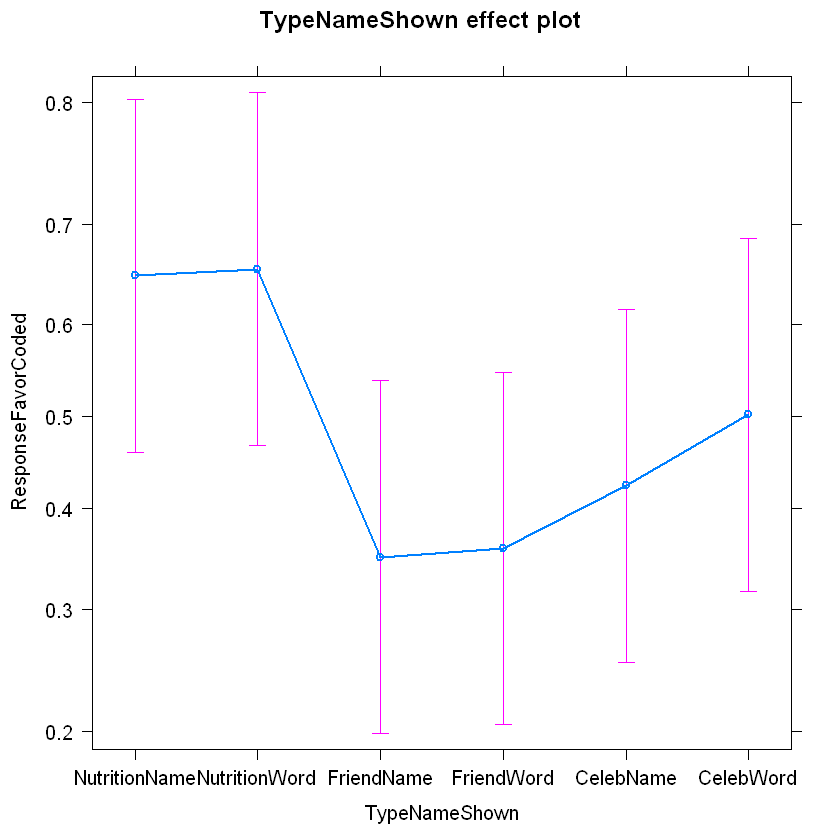

In [7]:
plot(effect("TypeNameShown", favor_test, main="", xlab="Name/Word Prime Presented", ylab="Probability of Favoring Nutrition Tips"))

p<-effect_plot(model=favor_test, pred=TypeNameShown, x.label="Name/Word Prime Presented", y.label="Probability of Favoring Nutrition Tips", colors="light blue", interval=FALSE, cat.geom="line")
p+  ylim(0.2, 0.75) #LESS UGLY BUT STILL EASY

In [8]:
Qtest <- lmer(ChosenQs ~ TypeNameShown  + (1|PID), data = longDF)
summary(Qtest)
confint(Qtest)

longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "NutritionName")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "CelebName")

longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "NutritionWord")


Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ TypeNameShown + (1 | PID)
   Data: longDF

REML criterion at convergence: 35536.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-3.00376 -0.70975  0.02693  0.75646  2.97312 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept)  9.511   3.084   
 Residual             22.587   4.753   
Number of obs: 5934, groups:  PID, 50

Fixed effects:
                           Estimate Std. Error t value
(Intercept)                11.21280    0.46152  24.295
TypeNameShownNutritionWord -0.06295    0.21351  -0.295
TypeNameShownFriendName    -2.21937    0.21357 -10.392
TypeNameShownFriendWord    -2.03409    0.21340  -9.532
TypeNameShownCelebName     -1.66687    0.21373  -7.799
TypeNameShownCelebWord     -1.10636    0.21378  -5.175

Correlation of Fixed Effects:
            (Intr) TyNSNW TyNSFN TyNSFW TyNSCN
TypNmShwnNW -0.231                            
TypNmShwnFN -0.231  0.499                 

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,2.5279555,3.7777032
.sigma,4.6659890,4.8376835
(Intercept),10.3020164,12.1236195
TypeNameShownNutritionWord,-0.4813144,0.3554017
TypeNameShownFriendName,-2.6378534,-1.8008942
TypeNameShownFriendWord,-2.4522314,-1.6159303
TypeNameShownCelebName,-2.0856780,-1.2480756
TypeNameShownCelebWord,-1.5252591,-0.6874632


Linear mixed model fit by REML ['lmerMod']
Formula: ResponseRT ~ ResponseFavor * TypeNameShown + (1 | SANPID)
   Data: longDF

REML criterion at convergence: 14103.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5618 -0.5890 -0.1776  0.3517  6.0494 

Random effects:
 Groups   Name        Variance Std.Dev.
 SANPID   (Intercept) 0.3088   0.5557  
 Residual             0.6043   0.7774  
Number of obs: 5936, groups:  SANPID, 50

Fixed effects:
                                                  Estimate Std. Error t value
(Intercept)                                        1.65136    0.08595  19.214
ResponseFavorfavoredQs                            -0.03405    0.05219  -0.652
TypeNameShownNutritionName                        -0.07960    0.05329  -1.494
TypeNameShownNutritionWord                        -0.02761    0.05319  -0.519
TypeNameShownFriendName                           -0.12210    0.04701  -2.597
TypeNameShownFriendWord                           -0.09286    0.04721 

NOTE: TypeNameShown is not a high-order term in the model


Linear mixed model fit by REML ['lmerMod']
Formula: ResponseRT ~ ResponseFavor * TypeNameShown + (1 | SANPID)
   Data: longDF

REML criterion at convergence: 14103.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5618 -0.5890 -0.1776  0.3517  6.0494 

Random effects:
 Groups   Name        Variance Std.Dev.
 SANPID   (Intercept) 0.3088   0.5557  
 Residual             0.6043   0.7774  
Number of obs: 5936, groups:  SANPID, 50

Fixed effects:
                                                  Estimate Std. Error t value
(Intercept)                                        1.65136    0.08595  19.214
ResponseFavorfavoredQs                            -0.03405    0.05219  -0.652
TypeNameShownNutritionName                        -0.07960    0.05329  -1.494
TypeNameShownNutritionWord                        -0.02761    0.05319  -0.519
TypeNameShownFriendName                           -0.12210    0.04701  -2.597
TypeNameShownFriendWord                           -0.09286    0.04721 

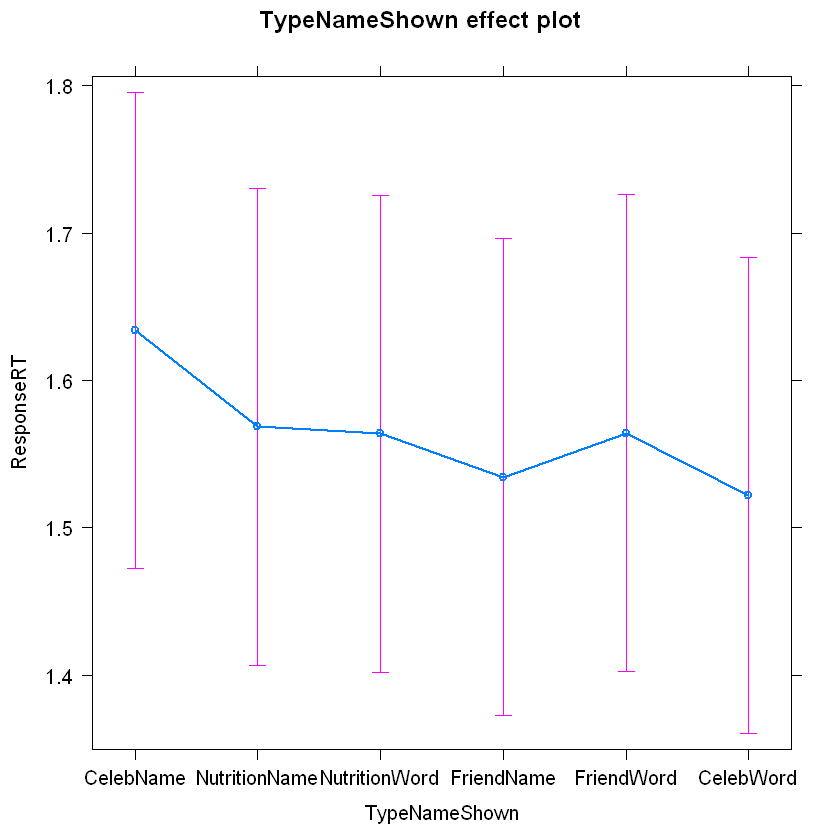

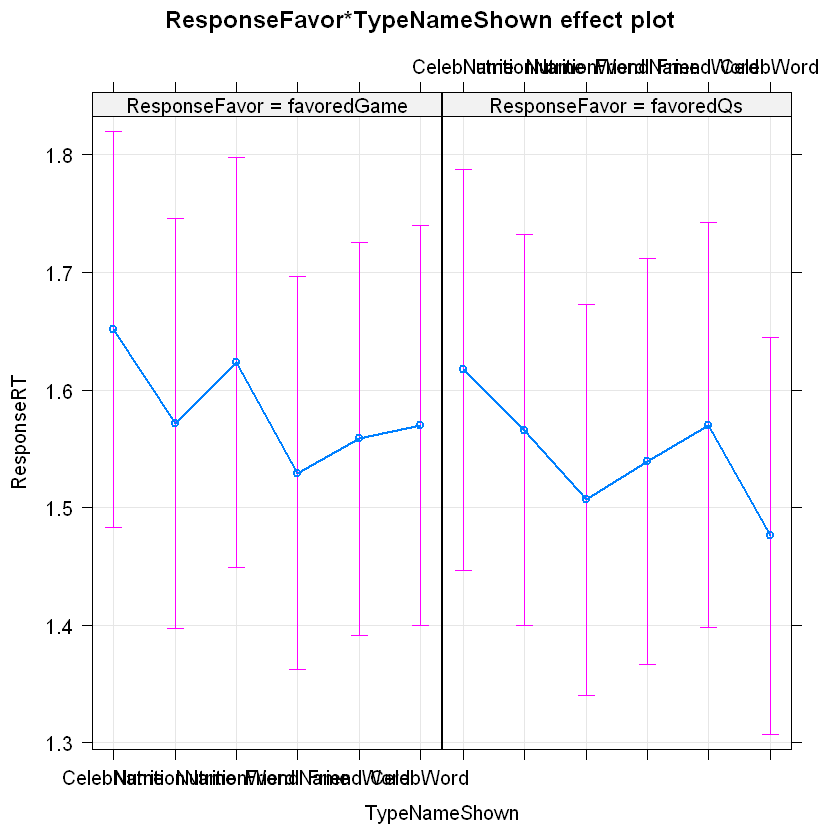

In [9]:

longDF$Domain <- relevel(longDF$Domain, ref = "Friend")
longDF$Domain <- relevel(longDF$Domain, ref = "Health")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "FriendWord")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "FriendName")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "NutritionWord")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "NutritionName")
longDF$TypeNameShown <- relevel(longDF$TypeNameShown, ref = "CelebName")


longDF$ResponseFavor <- as.factor(longDF$ResponseFavor)
RTtest <- lmer(ResponseRT ~ ResponseFavor *TypeNameShown + (1|SANPID), data = longDF)
summary(RTtest)
plot(effect("TypeNameShown", RTtest))


RTtest <- lmer(ResponseRT ~ ResponseFavor *TypeNameShown + (1|SANPID), data = longDF)
summary(RTtest)
plot(effect("ResponseFavor:TypeNameShown", RTtest), grid = TRUE)



In [10]:
ggline(longDF, x = "ResponseFavor", y = "ResponseRT", color = "TypeNameShown",
       add = c("mean_se"),
       linetype = "TypeNameShown", shape = "TypeNameShown",xlab="", ylab="Reaction Time (seconds)",
       palette = c("#16F39B","#168E52", "#3F9EFD", "#0658FD","#C681FC", "#8305E4" ))

P<- ggline(longDF, x = "ResponseFavor", y = "ResponseRT", color = "Domain",
       add = c("mean_se"),
       linetype = "Domain", shape = "Domain",xlab="", ylab="Reaction Time (seconds)",
       palette = c("#16F39B", "#3F9EFD", "#C681FC"))

P + facet_grid(~Condition)

ERROR: Error in ggline(longDF, x = "ResponseFavor", y = "ResponseRT", color = "TypeNameShown", : could not find function "ggline"


Warning message:
"Removed 64 row(s) containing missing values (geom_path)."

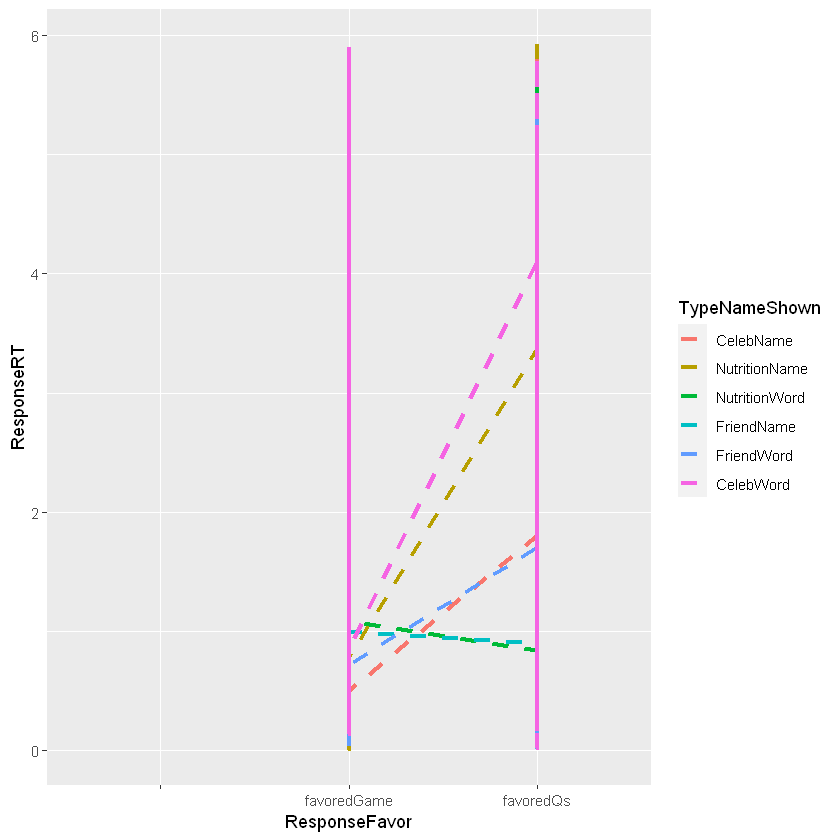

In [11]:
ggplot(data=longDF, aes(x=ResponseFavor, y = ResponseRT, group=TypeNameShown, color=TypeNameShown)) +
  geom_line(linetype="dashed",size=1.2)



***
***
***
~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~

# Financial Self-Regulation
## Social and Non-Social Primes 
### Within Subject (50 Pt)

First, read in the data

In [7]:
setwd("F://Moralizing Self-Regulation//Financial SelfReg Study//Name-Word Primes and Time Allocations//Social-Nonsocial")

bdata <- read.csv("BehavioralData_na.csv")
bdata

PID,Age,Gender..0.F..1.M..2.NonB.,Ethnicity,Index,Trial,CounterCode,TypeNameShown,Condition,Domain,...,ActEthic_Experience,ActEthic_Effort,ActEthic_Subjectivity,DoingMath_Ability,DoingMath_Confidence,DoingMath_Info,DoingMath_CodedInfo,DoingMath_Experience,DoingMath_Effort,DoingMath_Subjectivity
101,54,0,White,1,1,4,FinanceName,Relational,Finance,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,2,2,4,FinanceName,Relational,Finance,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,3,3,4,FinanceName,Relational,Finance,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,4,4,4,FinanceName,Relational,Finance,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,5,5,4,FinanceName,Relational,Finance,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,6,6,4,CelebWord,Conceptual,Celebrity,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,7,7,4,CelebWord,Conceptual,Celebrity,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,8,8,4,CelebWord,Conceptual,Celebrity,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,9,9,4,CelebWord,Conceptual,Celebrity,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7
101,54,0,White,10,10,4,CelebWord,Conceptual,Celebrity,...,5,2,2,7,7,"Base-rate information (i.e., existing statistical knowledge about the public)",4,5,3,7


## Convert some of the variables into factors

In [8]:
bdata$ResponseFavor <- factor(bdata$ResponseFavor)
bdata$TypeNameShown <- factor(bdata$TypeNameShown)
bdata$Condition <- factor(bdata$Condition)
bdata$Domain <- factor(bdata$Domain)
bdata$PID <- factor(bdata$PID)

<br>
<br>

## First see if there is a general tendency to favor one activity over the other, based on name prime

We're running two different GLMER models - one with TypeNameShown as the IV and one with an interaction between Condition and Domain as the IV

In [120]:
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "CelebWord")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FriendWord")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FinanceWord")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FriendName")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FinanceName")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "CelebName")


print("Run GLMER with TypeNameShown as the IVs")
favorTest <- glmer(ResponseFavor ~ TypeNameShown + (1|PID), data = bdata, family = binomial)
summary(favorTest)
# confint(favorTest)
                   
print("Run GLMER with Condition and Domain as the IVs")
favTest2 <- glmer(ResponseFavor ~ Condition*Domain + (1|PID), data=bdata, family=binomial)
summary(favTest2)

bdata$Domain <- relevel(bdata$Domain, ref = "Finance")

print("Run GLMER with Domain as the IV")
favTest3 <- glmer(ResponseFavor ~ Domain + (1|PID), data=bdata, family=binomial)
summary(favTest3)
# confint(favTest3)

[1] "Run GLMER with TypeNameShown as the IVs"


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ResponseFavor ~ TypeNameShown + (1 | PID)
   Data: bdata

     AIC      BIC   logLik deviance df.resid 
  5341.1   5388.0  -2663.6   5327.1     5922 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.2507 -0.5559 -0.0664  0.5326 16.9604 

Random effects:
 Groups Name        Variance Std.Dev.
 PID    (Intercept) 6.348    2.52    
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.0391     0.3703  -2.806  0.00501 ** 
TypeNameShownFinanceName   0.9872     0.1167   8.461  < 2e-16 ***
TypeNameShownFriendName   -0.2996     0.1191  -2.515  0.01190 *  
TypeNameShownFinanceWord   1.7579     0.1229  14.304  < 2e-16 ***
TypeNameShownFriendWord   -0.6763     0.1203  -5.623 1.87e-08 ***
TypeNameShownCelebWord     0.3517     0.1156   3.043  0.00234 ** 
---
Sig

[1] "Run GLMER with Condition and Domain as the IVs"


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ResponseFavor ~ Condition * Domain + (1 | PID)
   Data: bdata

     AIC      BIC   logLik deviance df.resid 
  5341.1   5388.0  -2663.6   5327.1     5922 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-9.2507 -0.5559 -0.0664  0.5326 16.9604 

Random effects:
 Groups Name        Variance Std.Dev.
 PID    (Intercept) 6.348    2.52    
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           0.7187     0.3707   1.939   0.0525 .  
ConditionRelational                  -0.7707     0.1201  -6.417 1.39e-10 ***
DomainCelebrity                      -1.4061     0.1211 -11.613  < 2e-16 ***
DomainFriend                         -2.4342     0.1281 -18.998  < 2e-16 ***
ConditionRelational:DomainCelebrity   0.4190     0.1664   2.518   0.0118 *  
Co

[1] "Run GLMER with Domain as the IV"


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: ResponseFavor ~ Domain + (1 | PID)
   Data: bdata

     AIC      BIC   logLik deviance df.resid 
  5395.3   5422.0  -2693.6   5387.3     5925 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.3589 -0.5915 -0.0671  0.5642 14.8962 

Random effects:
 Groups Name        Variance Std.Dev.
 PID    (Intercept) 6.195    2.489   
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.32379    0.36089   0.897     0.37    
DomainCelebrity -1.17357    0.08402 -13.967   <2e-16 ***
DomainFriend    -1.83754    0.08835 -20.798   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr) DmnClb
DomanClbrty -0.113       
DomainFrind -0.111  0.525

#### Compare to a null model for an ANOVA


In [122]:
favorTest.model = glmer(ResponseFavor ~ TypeNameShown + (1|PID), data = bdata, family = binomial)
favorTest.null = glmer(ResponseFavor ~  (1|PID), data = bdata, family = binomial)
anova(favorTest.null,favorTest.model)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
favorTest.null,2,5887.956,5901.331,-2941.978,5883.956,NA,NA,NA
favorTest.model,7,5341.140,5387.953,-2663.570,5327.140,556.8158,5,4.312204e-118


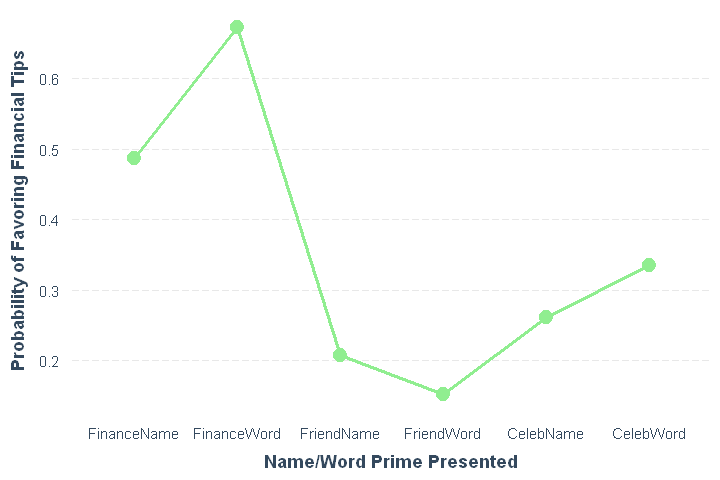

In [45]:
options(repr.plot.width = 6, repr.plot.height = 4)
p <- effect_plot(model=favorTest, pred=TypeNameShown, x.label="Name/Word Prime Presented", y.label="Probability of Favoring Financial Tips", colors="light green", interval=FALSE, cat.geom="line")
p 

<br>

### Now we're running an LMER with the response favor recoded as a numerical value such that we can get the means and make a boxplot

In [43]:
bdata$ResponseFavorCoded <- as.numeric(bdata$ResponseFavorCoded)

favor_test2 <- lmer(ResponseFavorCoded ~ TypeNameShown+ (1|PID), data = bdata)
summary(favor_test2)



Linear mixed model fit by REML ['lmerMod']
Formula: ResponseFavorCoded ~ TypeNameShown + (1 | PID)
   Data: bdata

REML criterion at convergence: 5741.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.92237 -0.75126 -0.02092  0.72857  2.94932 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 0.08379  0.2895  
 Residual             0.14801  0.3847  
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                         Estimate Std. Error t value
(Intercept)               0.52748    0.04272  12.347
TypeNameShownFinanceWord  0.10991    0.01728   6.362
TypeNameShownFriendName  -0.19498    0.01748 -11.155
TypeNameShownFriendWord  -0.24569    0.01718 -14.301
TypeNameShownCelebName   -0.15100    0.01731  -8.722
TypeNameShownCelebWord   -0.09759    0.01730  -5.642

Correlation of Fixed Effects:
             (Intr) TypNmShwnFnW TyNSFN TypNmShwnFrW TyNSCN
TypNmShwnFnW -0.202                                        
TypNmShwnFN  -0.200  0

#### Make some other dataframes that calculates the averages of these various factor variables

In [18]:
data_broadPrimeMeans <- bdata %>%
  group_by(TypeNameShown) %>%
  get_summary_stats(ResponseFavorCoded, type = "mean_se")#this also gets "se" or standard error - we need that for the error bars in our bar plot
data_broadPrimeMeans$n <- NULL #unnecessary 
data_broadPrimeMeans

TypeNameShown,variable,mean,se
FinanceName,ResponseFavorCoded,0.527,0.016
FinanceWord,ResponseFavorCoded,0.638,0.015
FriendName,ResponseFavorCoded,0.334,0.015
FriendWord,ResponseFavorCoded,0.278,0.014
CelebName,ResponseFavorCoded,0.374,0.015
CelebWord,ResponseFavorCoded,0.429,0.016


In [55]:
data_pidPrimeMeans <- bdata %>%
  group_by(PID,Condition, Domain, TypeNameShown) %>%
  get_summary_stats(ResponseFavorCoded, type = "mean_se")#this also gets "se" or standard error - we need that for the error bars in our bar plot
data_pidPrimeMeans$n <- NULL #unnecessary 
data_pidPrimeMeans

PID,TypeNameShown,Condition,Domain,variable,mean,se
101,CelebWord,Conceptual,Celebrity,ResponseFavorCoded,1.000,0.000
101,FinanceWord,Conceptual,Finance,ResponseFavorCoded,1.000,0.000
101,FriendWord,Conceptual,Friend,ResponseFavorCoded,0.050,0.050
101,CelebName,Relational,Celebrity,ResponseFavorCoded,1.000,0.000
101,FinanceName,Relational,Finance,ResponseFavorCoded,1.000,0.000
101,FriendName,Relational,Friend,ResponseFavorCoded,0.316,0.110
102,CelebWord,Conceptual,Celebrity,ResponseFavorCoded,0.150,0.082
102,FinanceWord,Conceptual,Finance,ResponseFavorCoded,0.684,0.110
102,FriendWord,Conceptual,Friend,ResponseFavorCoded,0.350,0.109
102,CelebName,Relational,Celebrity,ResponseFavorCoded,0.050,0.050


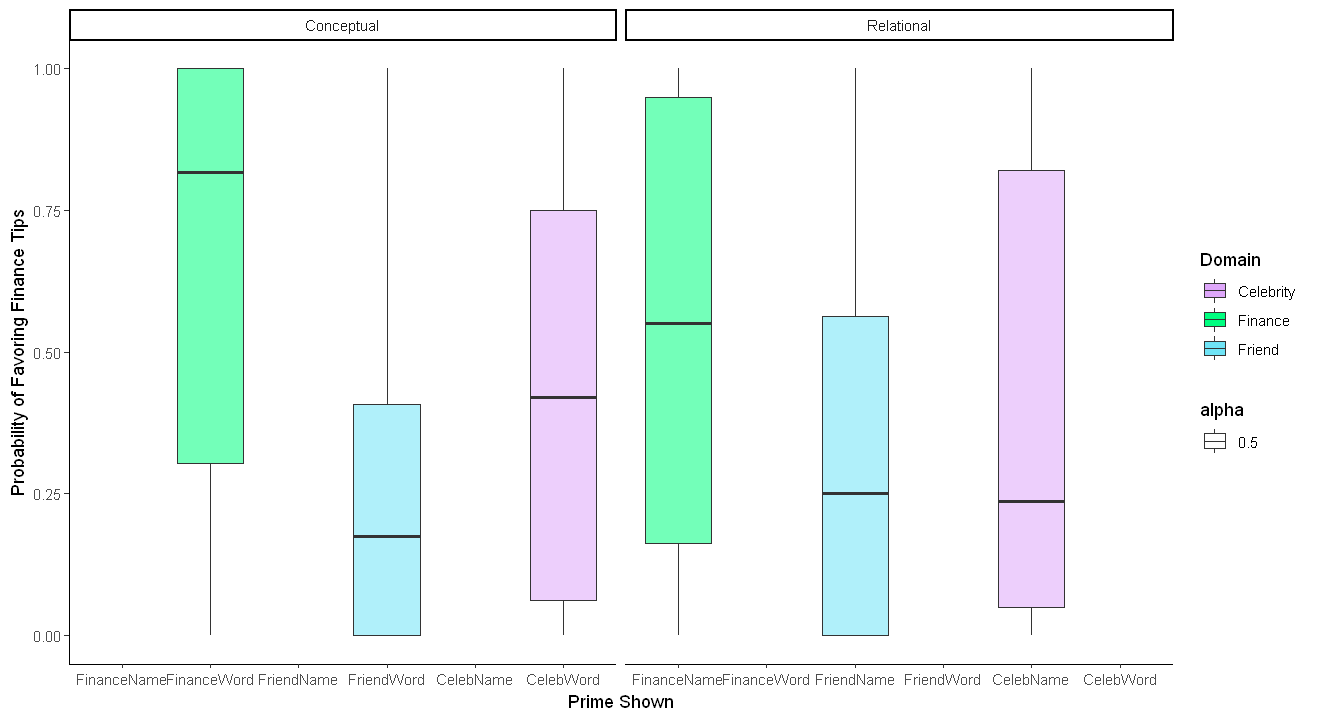

In [86]:
options(repr.plot.width = 11, repr.plot.height = 6)

p <- ggplot(data_pidPrimeMeans, aes(x=TypeNameShown, y=mean, fill=Domain, alpha=0.5)) + 
geom_boxplot() + theme_classic() +ylab("Probability of Favoring Finance Tips") + xlab("Prime Shown")

p <- p+facet_wrap(~Condition)
p <- p + scale_fill_manual(values=c("#DEA7FA", "#00FF80", "#6FE4F6"))
p


In [121]:
data_broadD <- bdata %>%
  group_by(Domain) %>%
  get_summary_stats(ResponseFavorCoded, type = "mean_se")#this also gets "se" or standard error - we need that for the error bars in our bar plot
data_broadD$n <- NULL #unnecessary 
data_broadD

Domain,variable,mean,se
Finance,ResponseFavorCoded,0.583,0.011
Celebrity,ResponseFavorCoded,0.401,0.011
Friend,ResponseFavorCoded,0.305,0.010


In [13]:
data_broadCD <- bdata %>%
  group_by(Condition, Domain) %>%
  get_summary_stats(ResponseFavorCoded, type = "mean_se")#this also gets "se" or standard error - we need that for the error bars in our bar plot
data_broadCD$n <- NULL #unnecessary 
data_broadCD

Condition,Domain,variable,mean,se
Conceptual,Celebrity,ResponseFavorCoded,0.429,0.016
Conceptual,Finance,ResponseFavorCoded,0.638,0.015
Conceptual,Friend,ResponseFavorCoded,0.278,0.014
Relational,Celebrity,ResponseFavorCoded,0.374,0.015
Relational,Finance,ResponseFavorCoded,0.527,0.016
Relational,Friend,ResponseFavorCoded,0.334,0.015


In [14]:
data_pidCD <- bdata %>%
  group_by(PID, Condition, Domain) %>%
  get_summary_stats(ResponseFavorCoded, type = "mean_se")#this also gets "se" or standard error - we need that for the error bars in our bar plot
data_pidCD$n <- NULL #unnecessary 
data_pidCD

PID,Condition,Domain,variable,mean,se
101,Conceptual,Celebrity,ResponseFavorCoded,1.000,0.000
101,Conceptual,Finance,ResponseFavorCoded,1.000,0.000
101,Conceptual,Friend,ResponseFavorCoded,0.050,0.050
101,Relational,Celebrity,ResponseFavorCoded,1.000,0.000
101,Relational,Finance,ResponseFavorCoded,1.000,0.000
101,Relational,Friend,ResponseFavorCoded,0.316,0.110
102,Conceptual,Celebrity,ResponseFavorCoded,0.150,0.082
102,Conceptual,Finance,ResponseFavorCoded,0.684,0.110
102,Conceptual,Friend,ResponseFavorCoded,0.350,0.109
102,Relational,Celebrity,ResponseFavorCoded,0.050,0.050


<br>

## Now we're going to look at the average amount of time participants on average allocated towards the finance tips

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ TypeNameShown + (1 | PID)
   Data: bdata

REML criterion at convergence: 35182.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9405 -0.7106 -0.0160  0.6988  3.4984 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept)  9.707   3.116   
 Residual             21.369   4.623   
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                         Estimate Std. Error t value
(Intercept)               10.2695     0.4644  22.112
TypeNameShownFinanceWord   1.0491     0.2076   5.054
TypeNameShownFriendName   -2.0952     0.2100  -9.976
TypeNameShownFriendWord   -2.7785     0.2064 -13.460
TypeNameShownCelebName    -1.5599     0.2080  -7.499
TypeNameShownCelebWord    -1.0690     0.2078  -5.144

Correlation of Fixed Effects:
             (Intr) TypNmShwnFnW TyNSFN TypNmShwnFrW TyNSCN
TypNmShwnFnW -0.223                                        
TypNmShwnFN  -0.221  0.494               

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,2.5547625,3.8154501
.sigma,4.5384132,4.7054855
(Intercept),9.3528333,11.1861533
TypeNameShownFinanceWord,0.6423792,1.4558306
TypeNameShownFriendName,-2.5066820,-1.6836118
TypeNameShownFriendWord,-3.1830160,-2.3740285
TypeNameShownCelebName,-1.9675690,-1.1523399
TypeNameShownCelebWord,-1.4763112,-0.6617942


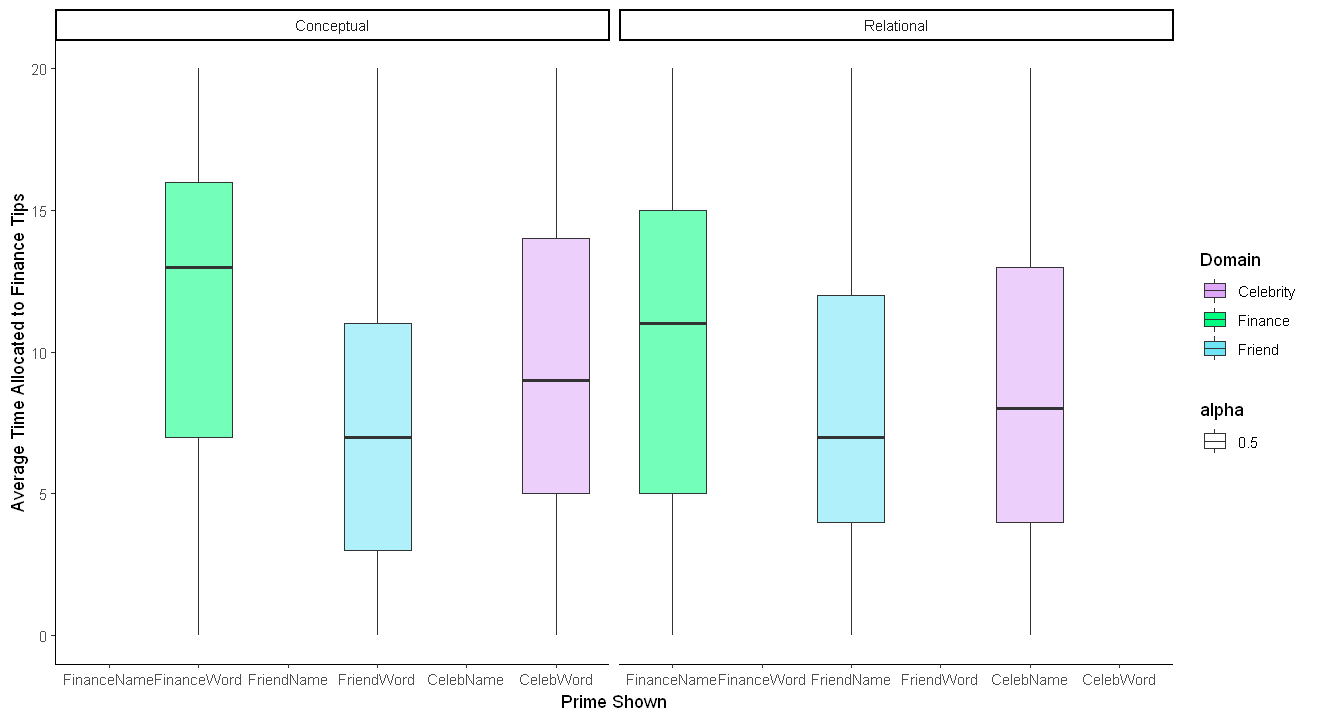

In [85]:
options(repr.plot.width = 11, repr.plot.height = 6)

Qtest <- lmer(ChosenQs ~ TypeNameShown  + (1|PID), data = bdata)
summary(Qtest)
confint(Qtest)

pal = (c("#DEA7FA", "#00FF80", "#6FE4F6"))
p2 <- ggplot(bdata, aes(x=TypeNameShown, y=ChosenQs, fill=Domain, alpha=0.5)) + 
geom_boxplot() + theme_classic() +ylab("Average Time Allocated to Finance Tips") + xlab("Prime Shown") 
    


p2 <- p2+facet_wrap(~Condition)
p2 <- p2 + scale_fill_manual(values=c("#DEA7FA", "#00FF80", "#6FE4F6"))
p2

In [60]:
q_aov <- aov(ChosenQs ~ Condition *Domain, data = bdata)
summary(q_aov)
etaSquared(q_aov)

TukeyHSD(q_aov)

                   Df Sum Sq Mean Sq F value  Pr(>F)    
Condition           1     86      86   2.788   0.095 .  
Domain              2   9041    4521 146.157 < 2e-16 ***
Condition:Domain    2    845     423  13.667 1.2e-06 ***
Residuals        5923 183199      31                    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

ERROR: Error in etaSquared(q_aov): could not find function "etaSquared"


<br>

## Let's look at Reaction Time

### See how RT may be different for favoring one activity over another, and for the different primes shown

                              Df Sum Sq Mean Sq F value   Pr(>F)    
ResponseFavor                  1      9   8.706   8.067 0.004524 ** 
TypeNameShown                  5     15   2.961   2.744 0.017590 *  
ResponseFavor:TypeNameShown    5     24   4.758   4.409 0.000521 ***
Residuals                   5917   6386   1.079                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ResponseRT ~ ResponseFavor * TypeNameShown, data = bdata)

$ResponseFavor
                            diff        lwr       upr     p adj
favoredQs-favoredGame 0.07740243 0.02397765 0.1308272 0.0045239

$TypeNameShown
                                diff         lwr        upr     p adj
FinanceWord-FinanceName -0.001014322 -0.13398629 0.13195765 1.0000000
FriendName-FinanceName   0.146690921  0.01236542 0.28101642 0.0228949
FriendWord-FinanceName   0.067458926 -0.06456545 0.19948330 0.6920628
CelebName-FinanceName    0.047329275 -0.08591269 0.18057124 0.9139266
CelebWord-FinanceName    0.052074984 -0.08106528 0.18521525 0.8753864
FriendName-FinanceWord   0.147705243  0.01337975 0.28203074 0.0213950
FriendWord-FinanceWord   0.068473247 -0.06355113 0.20049762 0.6781508
CelebName-FinanceWord    0.048343597 -0.08489837 0.18158556 0.9064662
CelebWord-FinanceWord    0.053089306 -0.08005096 0.186229

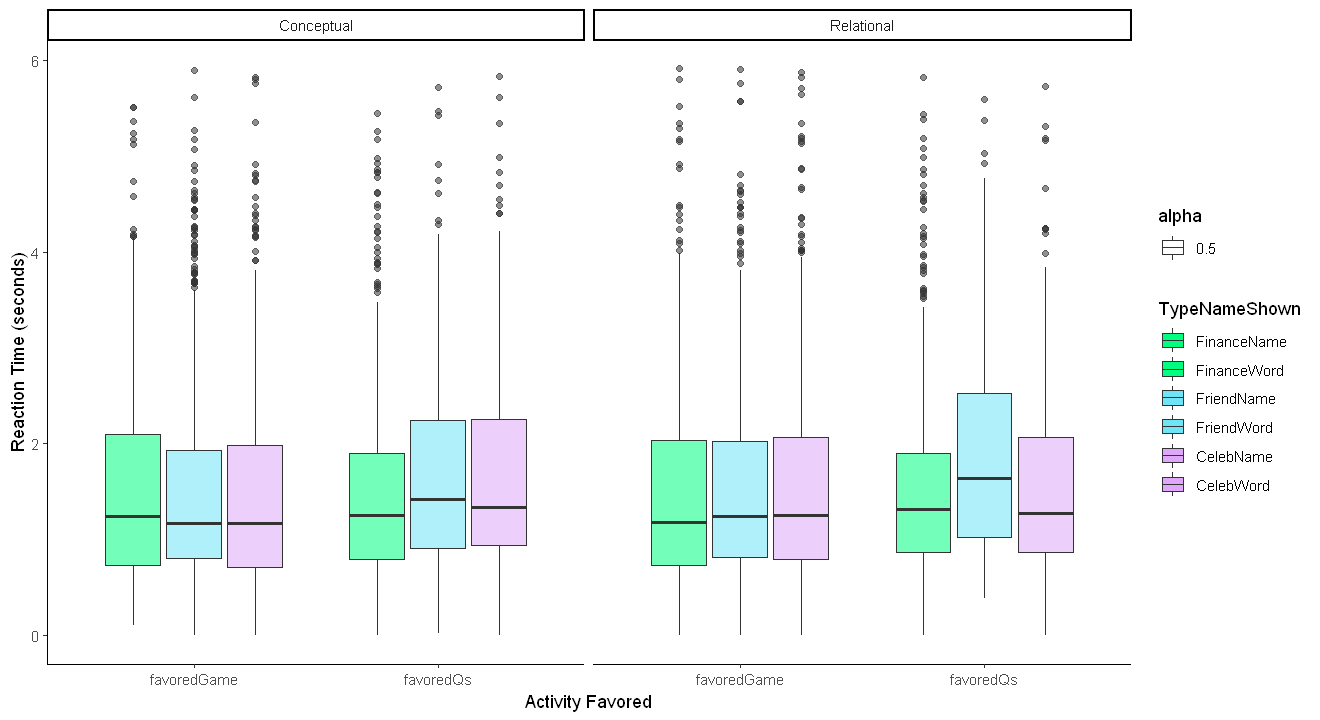

In [87]:
interaction2 <- aov(ResponseRT ~ ResponseFavor *TypeNameShown, data = bdata)
summary(interaction2)
# etaSquared(interaction2)
TukeyHSD(interaction2)

p3 <- ggplot(bdata, aes(x=ResponseFavor, y=ResponseRT, fill=TypeNameShown, alpha=0.5)) + 
geom_boxplot() + theme_classic() +ylab("Reaction Time (seconds)") + xlab("Activity Favored") 
    

p3 <- p3+facet_wrap(~Condition)
p3 <- p3 + scale_fill_manual(values=c("#00FF80", "#00FF80",  "#6FE4F6", "#6FE4F6", "#DEA7FA", "#DEA7FA"))
p3

<br>

## Look at the relational self-reports

              Df Sum Sq Mean Sq F value   Pr(>F)    
Rating         3  126.2    42.1  14.284 5.40e-09 ***
Prime          2  789.8   394.9 134.055  < 2e-16 ***
Rating:Prime   6  119.6    19.9   6.768 5.99e-07 ***
Residuals    586 1726.2     2.9                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
2 observations deleted due to missingness

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Value ~ Rating * Prime, data = longData1)

$Rating
                                         diff        lwr        upr     p adj
Duration-Closeness                 1.00666667  0.4960690  1.5172644 0.0000030
Let-Down Concern-Closeness        -0.05543624 -0.5668899  0.4560175 0.9923942
Moral Obligation-Closeness        -0.09570470 -0.6071584  0.4157490 0.9630506
Let-Down Concern-Duration         -1.06210291 -1.5735566 -0.5506492 0.0000008
Moral Obligation-Duration         -1.10237136 -1.6138251 -0.5909177 0.0000003
Moral Obligation-Let-Down Concern -0.04026846 -0.5525767  0.4720398 0.9970589

$Prime
                         diff        lwr        upr    p adj
Friend-Financial     0.266534 -0.1377537  0.6708217 0.268869
Celebrity-Financial -2.291610 -2.6953922 -1.8878281 0.000000
Celebrity-Friend    -2.558144 -2.9619262 -2.1543621 0.000000

$`Rating:Prime`
                                       

Warning message:
"Removed 2 rows containing non-finite values (stat_summary)."Warning message:
"Removed 2 rows containing missing values (geom_point)."

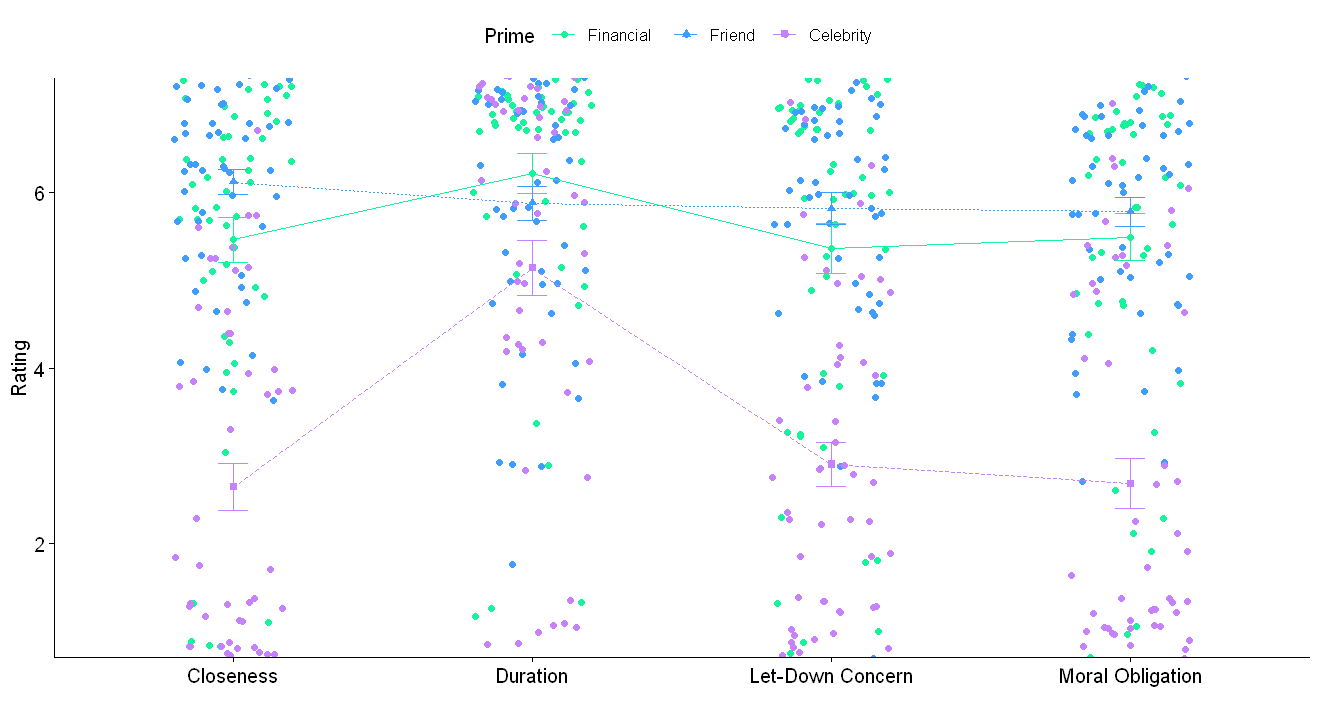

In [102]:
longData1 <- read.csv("LongData.csv")
longData1$Prime <- factor(longData1$Prime,levels = c("Financial", "Friend", "Celebrity"))
longData1$Rating <- factor(longData1$Rating)
longData1$PID <- factor(longData1$PID)

longData1$Value <- longData1$ï..Value
r_interaction1 <- aov(Value ~ Rating *Prime, data = longData1)
summary(r_interaction1)

# # etaSquared(r_interaction1)
TukeyHSD(r_interaction1)
options(repr.plot.width = 11, repr.plot.height = 6)

ggline(longData1, x = "Rating", y = "Value", color = "Prime",
       add = c("mean_se", "jitter"),
       linetype = "Prime", shape = "Prime",xlab="", ylab="Rating",panel.labs = list(NameShown = c("Celebrity", "Financial", "Friend")),ylim = c(1, 7),
       palette = c("#16F39B", "#3F9EFD", "#C681FC"))

<br>

## Look at reported moral obligation as a moderator for time allocated towards finance tips

[1] "Use TypeNameShown for Interaction"


Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ Moral_Obl + (1 | PID)
   Data: bdata

REML criterion at convergence: 17382.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.90053 -0.72411 -0.01117  0.70672  2.90740 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 12.08    3.475   
 Residual             20.81    4.562   
Number of obs: 2929, groups:  PID, 50

Fixed effects:
            Estimate Std. Error t value
(Intercept)  8.89130    0.54067   16.45
Moral_Obl    0.04488    0.04579    0.98

Correlation of Fixed Effects:
          (Intr)
Moral_Obl -0.386

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ Moral_Obl * TypeNameShown + (1 | PID)
   Data: bdata

REML criterion at convergence: 17281.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.89033 -0.70541 -0.03493  0.70287  2.93574 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 12.28    3.504   
 Residual             20.07    4.480   
Number of obs: 2929, groups:  PID, 50

Fixed effects:
                                  Estimate Std. Error t value
(Intercept)                       10.69887    0.70706  15.131
Moral_Obl                         -0.07904    0.09007  -0.878
TypeNameShownFriendName           -1.64267    0.94260  -1.743
TypeNameShownCelebName            -1.87661    0.54008  -3.475
Moral_Obl:TypeNameShownFriendName -0.06359    0.16199  -0.393
Moral_Obl:TypeNameShownCelebName   0.04160    0.11561   0.360

Correlation of Fixed Effects:
            (Intr) Mrl_Ob TyNSFN TyNSCN M_O:TNSF
Moral_Obl   -0.684         

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


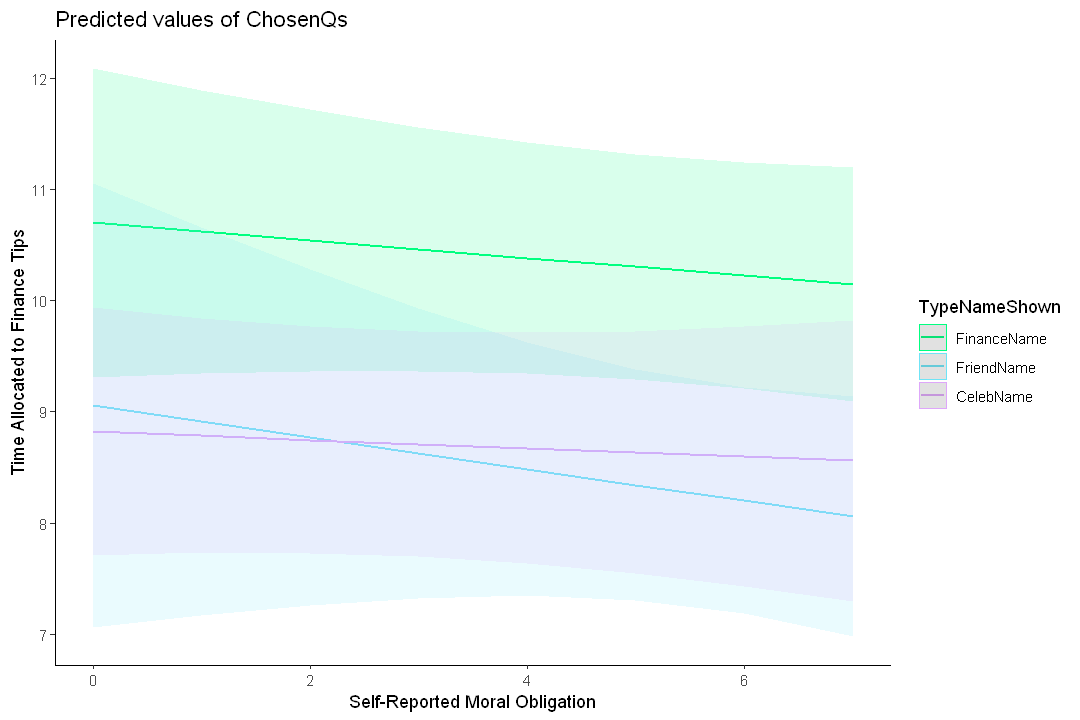

In [89]:
options(repr.plot.width = 9, repr.plot.height = 6)
print("Use TypeNameShown for Interaction")

moral <- lmer(ChosenQs ~ Moral_Obl + (1|PID), data=bdata)
summary(moral)
moralFinTime <- lmer(ChosenQs ~ Moral_Obl*TypeNameShown + (1|PID), data=bdata)
summary(moralFinTime)

# Moral_qTime <- interact_plot(moralFinTime, pred = Moral_Obl, modx = TypeNameShown, x.label= "Self-Reported Moral Obligation", y.label = "Amount of Time Chosen for Financial Tips", legend.main="Prime", palette = c("#16F39B", "#3F9EFD", "#16F39B", "#3F9EFD"), line.thickness = 1.5)
# Moral_qTime + theme_classic() + scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA"))  #this has kind of naked lines 

moral_qTime_plot <- plot_model(moralFinTime, type = "int")
moral_qTime_plot <- moral_qTime_plot + theme_classic() + scale_fill_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA"))+ scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA")) 
moral_qTime_plot + ylab("Time Allocated to Finance Tips") + xlab("Self-Reported Moral Obligation")

# print("Use Domain * Condition Interaction")
# moralFinTime2 <- lmer(ChosenQs ~ Moral_Obl*Domain*Condition + (1|PID), data=bdata)
# summary(moralFinTime2)

# moral_qTime_plot2<-plot_model(moralFinTime2, type = "pred", terms = c("Moral_Obl", "Domain [Finance,Friend, Celebrity]", "Condition"))
# moral_qTime_plot2<-moral_qTime_plot2 + theme_classic() + scale_fill_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA", "#00FF80",  "#6FE4F6","#DEA7FA"))+ scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA", "#00FF80",  "#6FE4F6","#DEA7FA"))
# moral_qTime_plot2 + ylab("Time Allocated to Finance Tips") + xlab("Self-Reported Moral Obligation")

In [70]:
sim_slopes(moralFinTime, pred = Moral_Obl, modx = TypeNameShown, johnson_neyman = FALSE)


If summ is taking too long to run, try setting pvals = FALSE, t.df = 's' if
you have the lmerTest package, or t.df = 'residual' (or some number).


SIMPLE SLOPES ANALYSIS 

Slope of Moral_Obl when TypeNameShown = CelebName: 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.04   0.09    -0.42   0.68

Slope of Moral_Obl when TypeNameShown = FriendName: 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.14   0.15    -0.94   0.35

Slope of Moral_Obl when TypeNameShown = FinanceName: 

   Est.   S.E.   t val.      p
------- ------ -------- ------
  -0.08   0.09    -0.88   0.38


Look at other potential relationship moderators

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ Closeness + (1 | PID)
   Data: bdata

REML criterion at convergence: 17383.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.89621 -0.71632 -0.00661  0.71442  2.93414 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 12.15    3.485   
 Residual             20.82    4.563   
Number of obs: 2929, groups:  PID, 50

Fixed effects:
             Estimate Std. Error t value
(Intercept)  9.103368   0.540723  16.836
Closeness   -0.001576   0.043876  -0.036

Correlation of Fixed Effects:
          (Intr)
Closeness -0.380

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ Closeness * TypeNameShown + (1 | PID)
   Data: bdata

REML criterion at convergence: 17275.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9103 -0.7098 -0.0378  0.7066  2.9476 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 12.41    3.522   
 Residual             20.03    4.475   
Number of obs: 2929, groups:  PID, 50

Fixed effects:
                                  Estimate Std. Error t value
(Intercept)                       11.36583    0.74577  15.240
Closeness                         -0.20015    0.09837  -2.035
TypeNameShownFriendName           -1.42696    1.22278  -1.167
TypeNameShownCelebName            -2.56647    0.58946  -4.354
Closeness:TypeNameShownFriendName -0.07967    0.20231  -0.394
Closeness:TypeNameShownCelebName   0.17131    0.12488   1.372

Correlation of Fixed Effects:
            (Intr) Clsnss TyNSFN TyNSCN C:TNSF
Closeness   -0.719                     

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


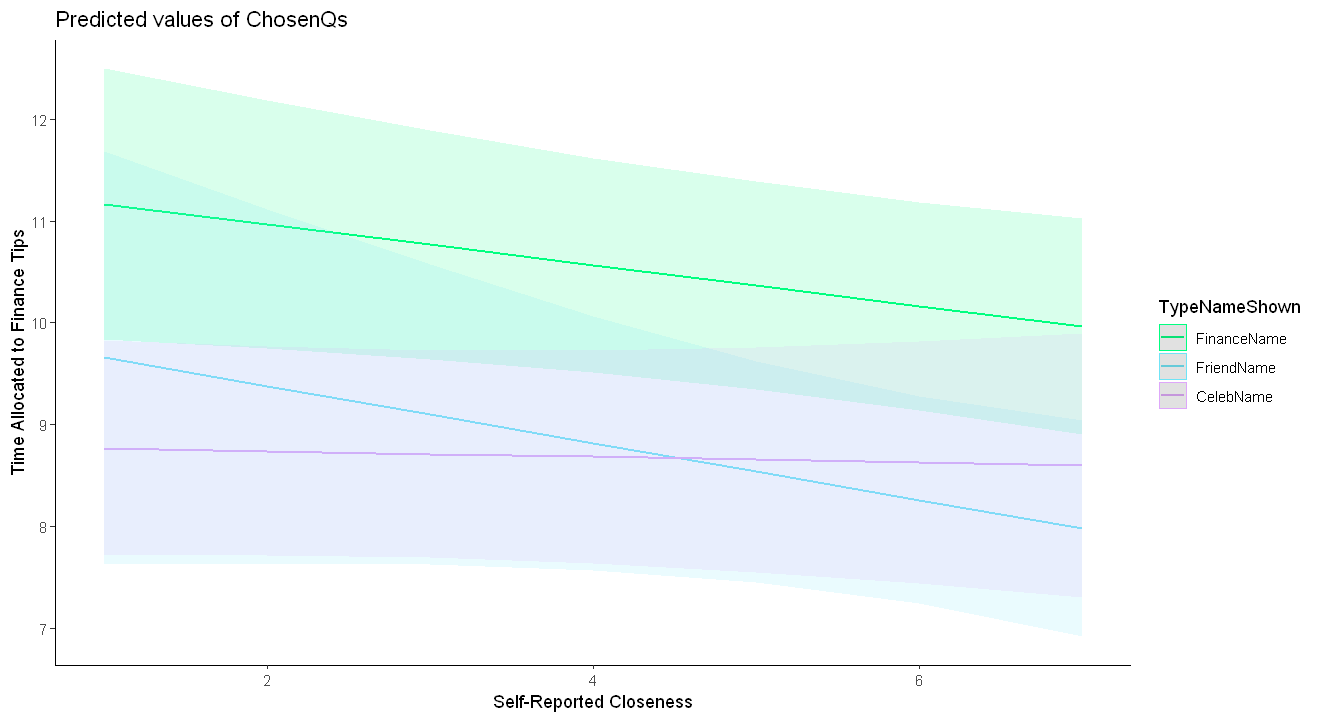

In [106]:
close <- lmer(ChosenQs ~ Closeness + (1|PID), data=bdata)
summary(close)
closeFinTime <- lmer(ChosenQs ~ Closeness*TypeNameShown + (1|PID), data=bdata)
summary(closeFinTime)

# Moral_qTime <- interact_plot(moralFinTime, pred = Moral_Obl, modx = TypeNameShown, x.label= "Self-Reported Moral Obligation", y.label = "Amount of Time Chosen for Financial Tips", legend.main="Prime", palette = c("#16F39B", "#3F9EFD", "#16F39B", "#3F9EFD"), line.thickness = 1.5)
# Moral_qTime + theme_classic() + scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA"))  #this has kind of naked lines 

closeFinTimeplot <- plot_model(closeFinTime, type = "int")
closeFinTimeplot <- closeFinTimeplot + theme_classic() + scale_fill_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA"))+ scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA")) 
closeFinTimeplot + ylab("Time Allocated to Finance Tips") + xlab("Self-Reported Closeness")


Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ Duration + (1 | PID)
   Data: bdata

REML criterion at convergence: 17382.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.89353 -0.71882 -0.00527  0.71110  2.95760 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 12.18    3.490   
 Residual             20.81    4.562   
Number of obs: 2929, groups:  PID, 50

Fixed effects:
            Estimate Std. Error t value
(Intercept)  9.33301    0.61975  15.059
Duration    -0.04153    0.06397  -0.649

Correlation of Fixed Effects:
         (Intr)
Duration -0.589

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ Duration * TypeNameShown + (1 | PID)
   Data: bdata

REML criterion at convergence: 17270.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.84082 -0.69299 -0.01663  0.71250  2.94403 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 12.46    3.530   
 Residual             19.99    4.471   
Number of obs: 2929, groups:  PID, 50

Fixed effects:
                                 Estimate Std. Error t value
(Intercept)                       12.3647     0.8644  14.304
Duration                          -0.3363     0.1112  -3.024
TypeNameShownFriendName           -3.2028     0.9755  -3.283
TypeNameShownCelebName            -2.7991     0.8066  -3.470
Duration:TypeNameShownFriendName   0.1752     0.1589   1.103
Duration:TypeNameShownCelebName    0.1721     0.1331   1.293

Correlation of Fixed Effects:
            (Intr) Duratn TyNSFN TyNSCN D:TNSF
Duration    -0.800                   

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


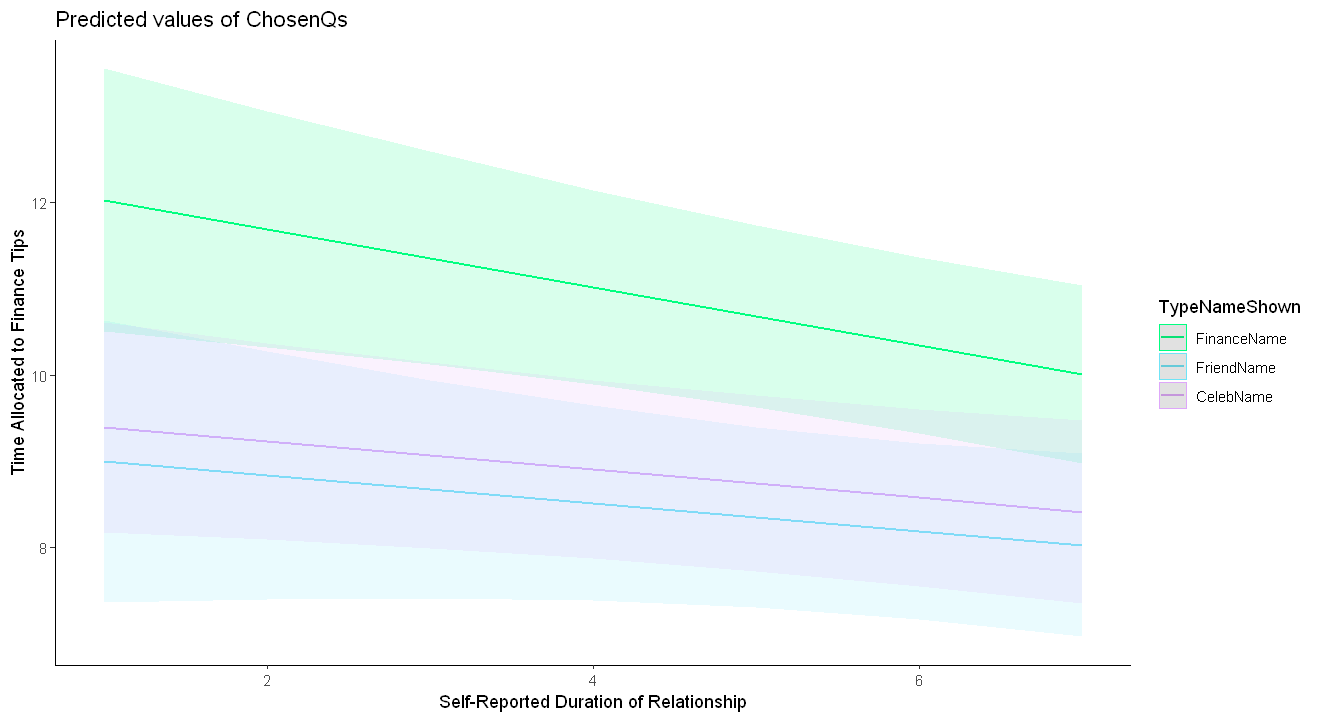

In [105]:
dur <- lmer(ChosenQs ~ Duration + (1|PID), data=bdata)
summary(dur)
durFinTime <- lmer(ChosenQs ~ Duration*TypeNameShown + (1|PID), data=bdata)
summary(durFinTime)

# Moral_qTime <- interact_plot(moralFinTime, pred = Moral_Obl, modx = TypeNameShown, x.label= "Self-Reported Moral Obligation", y.label = "Amount of Time Chosen for Financial Tips", legend.main="Prime", palette = c("#16F39B", "#3F9EFD", "#16F39B", "#3F9EFD"), line.thickness = 1.5)
# Moral_qTime + theme_classic() + scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA"))  #this has kind of naked lines 

durFinTimeplt <- plot_model(durFinTime, type = "int")
durFinTimeplt <- durFinTimeplt + theme_classic() + scale_fill_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA"))+ scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA")) 
durFinTimeplt + ylab("Time Allocated to Finance Tips") + xlab("Self-Reported Duration of Relationship")


Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ Let_Down + (1 | PID)
   Data: bdata

REML criterion at convergence: 17383.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.89665 -0.72188 -0.01082  0.70840  2.92308 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 12.08    3.476   
 Residual             20.82    4.563   
Number of obs: 2929, groups:  PID, 50

Fixed effects:
            Estimate Std. Error t value
(Intercept)  8.99015    0.54195  16.588
Let_Down     0.02298    0.04605   0.499

Correlation of Fixed Effects:
         (Intr)
Let_Down -0.391

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ Let_Down * TypeNameShown + (1 | PID)
   Data: bdata

REML criterion at convergence: 17274.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.88590 -0.69893 -0.02842  0.69393  2.90690 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept) 12.40    3.522   
 Residual             20.02    4.474   
Number of obs: 2929, groups:  PID, 50

Fixed effects:
                                 Estimate Std. Error t value
(Intercept)                      11.58792    0.70156  16.517
Let_Down                         -0.24523    0.08834  -2.776
TypeNameShownFriendName          -3.36624    0.82425  -4.084
TypeNameShownCelebName           -2.92675    0.55224  -5.300
Let_Down:TypeNameShownFriendName  0.24730    0.14317   1.727
Let_Down:TypeNameShownCelebName   0.26699    0.12232   2.183

Correlation of Fixed Effects:
            (Intr) Lt_Dwn TyNSFN TyNSCN L_D:TNSF
Let_Down    -0.675                 

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


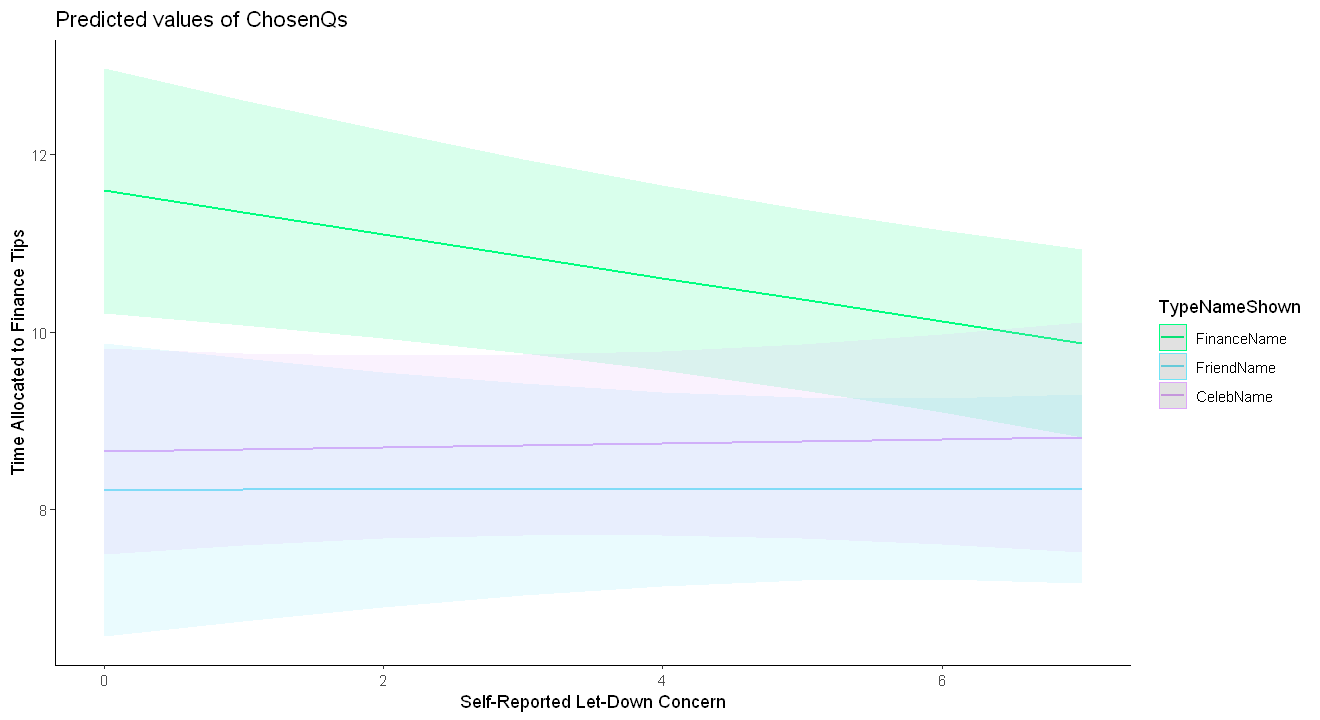

In [104]:
ld <- lmer(ChosenQs ~ Let_Down + (1|PID), data=bdata)
summary(ld)
ldFinTime <- lmer(ChosenQs ~ Let_Down*TypeNameShown + (1|PID), data=bdata)
summary(ldFinTime)

# Moral_qTime <- interact_plot(moralFinTime, pred = Moral_Obl, modx = TypeNameShown, x.label= "Self-Reported Moral Obligation", y.label = "Amount of Time Chosen for Financial Tips", legend.main="Prime", palette = c("#16F39B", "#3F9EFD", "#16F39B", "#3F9EFD"), line.thickness = 1.5)
# Moral_qTime + theme_classic() + scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA"))  #this has kind of naked lines 

ldFinTimeplot <- plot_model(ldFinTime, type = "int")
ldFinTimeplot <- ldFinTimeplot + theme_classic() + scale_fill_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA"))+ scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA")) 
ldFinTimeplot + ylab("Time Allocated to Finance Tips") + xlab("Self-Reported Let-Down Concern")



<br>

## Look at relative desire as an IV

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ DiffWant * Domain * Condition + (1 | PID)
   Data: bdata

REML criterion at convergence: 35155.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9158 -0.6983 -0.0201  0.6975  3.4824 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept)  4.475   2.115   
 Residual             21.356   4.621   
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                                           Estimate Std. Error t value
(Intercept)                                 9.86433    0.34488  28.602
DiffWant                                    0.97531    0.12952   7.530
DomainFinance                               1.98384    0.21500   9.227
DomainFriend                               -1.80048    0.21431  -8.401
ConditionRelational                        -0.56108    0.21569  -2.601
DiffWant:DomainFinance                     -0.19657    0.08065  -2.437
DiffWant:DomainFriend                      -0.1310

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


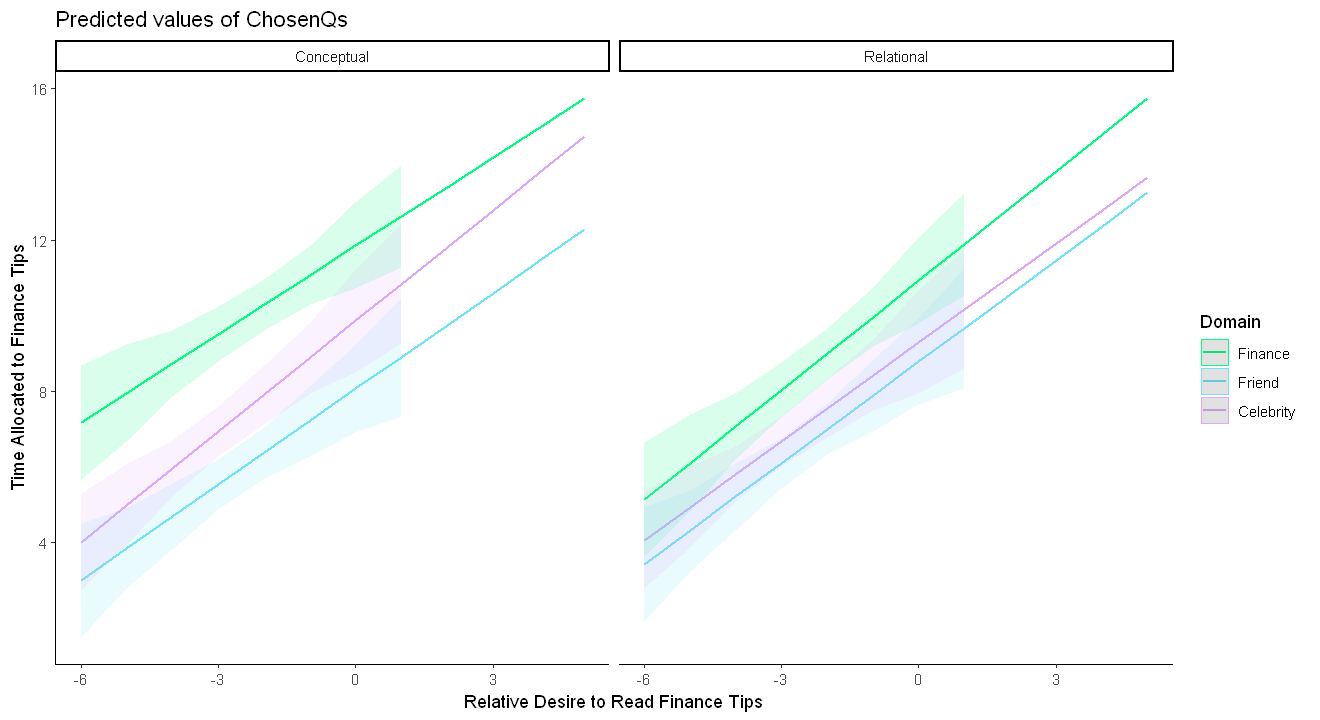

In [82]:
diff_int2<- lmer(ChosenQs~DiffWant*Domain*Condition + (1|PID), data=bdata)
summary(diff_int2)


p<-plot_model(diff_int2, type = "pred", terms = c("DiffWant", "Domain [Finance,Friend, Celebrity]", "Condition"))
p<-p + theme_classic() + scale_fill_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA", "#00FF80",  "#6FE4F6","#DEA7FA"))+ scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA", "#00FF80",  "#6FE4F6","#DEA7FA"))
p + ylab("Time Allocated to Finance Tips") + xlab("Relative Desire to Read Finance Tips")

<br>

## Look at Individual Difference Measures, Primes, and Time Allocations

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ IRI.Total * TypeNameShown + (1 | PID)
   Data: bdata

REML criterion at convergence: 35165.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9723 -0.7124 -0.0203  0.7065  3.3705 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept)  9.74    3.121   
 Residual             21.18    4.603   
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                                    Estimate Std. Error t value
(Intercept)                         6.861780   3.130613   2.192
IRI.Total                           0.035737   0.032467   1.101
TypeNameShownFinanceWord           -2.085398   1.392889  -1.497
TypeNameShownFriendName            -1.029393   1.429549  -0.720
TypeNameShownFriendWord             3.458432   1.368390   2.527
TypeNameShownCelebName             -2.909982   1.393091  -2.089
TypeNameShownCelebWord             -1.359094   1.390668  -0.977
IRI.Total:TypeNameShownFinanceWord  0.0

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ IRI.Total * Domain * Condition + (1 | PID)
   Data: bdata

REML criterion at convergence: 35165.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9723 -0.7124 -0.0203  0.7065  3.3705 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept)  9.74    3.121   
 Residual             21.18    4.603   
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                                            Estimate Std. Error t value
(Intercept)                                  5.50269    3.13040   1.758
IRI.Total                                    0.03877    0.03246   1.194
DomainFinance                               -0.72630    1.39241  -0.522
DomainFriend                                 4.81753    1.36788   3.522
ConditionRelational                         -1.55089    1.39269  -1.114
IRI.Total:DomainFinance                      0.02980    0.01443   2.065
IRI.Total:DomainFriend                    

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


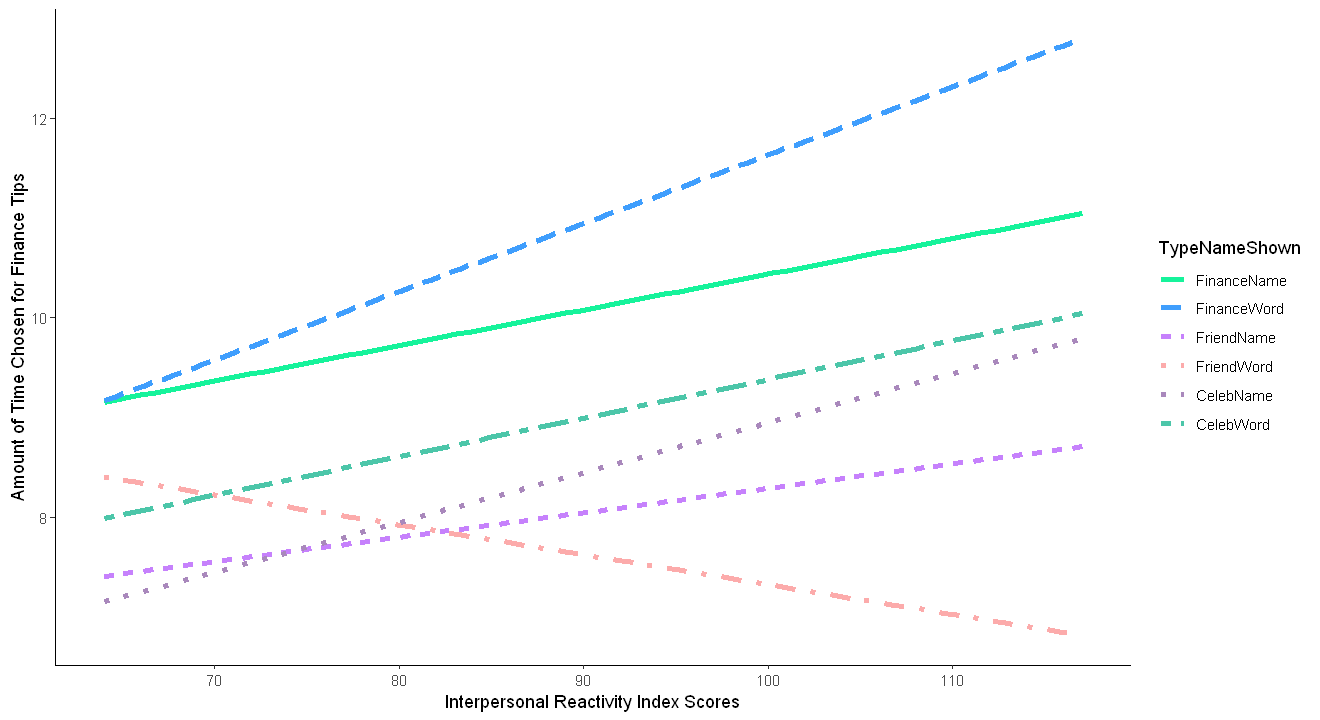

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


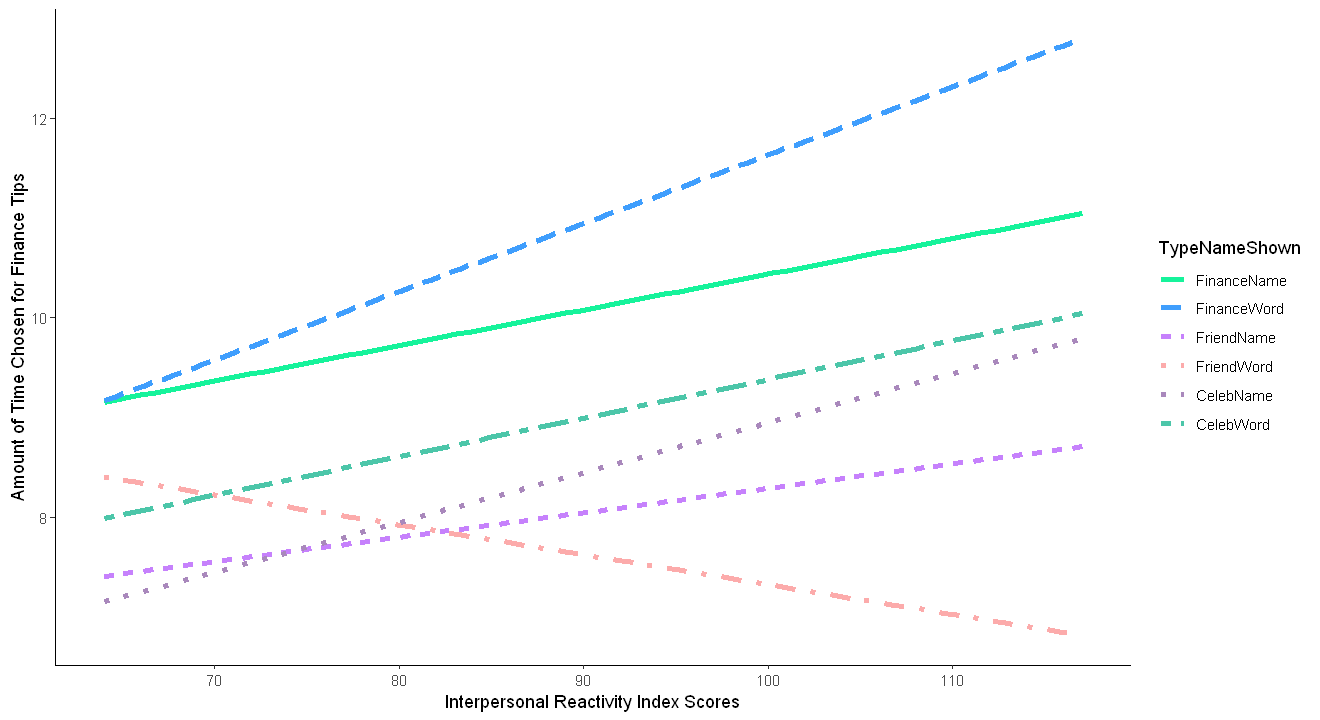

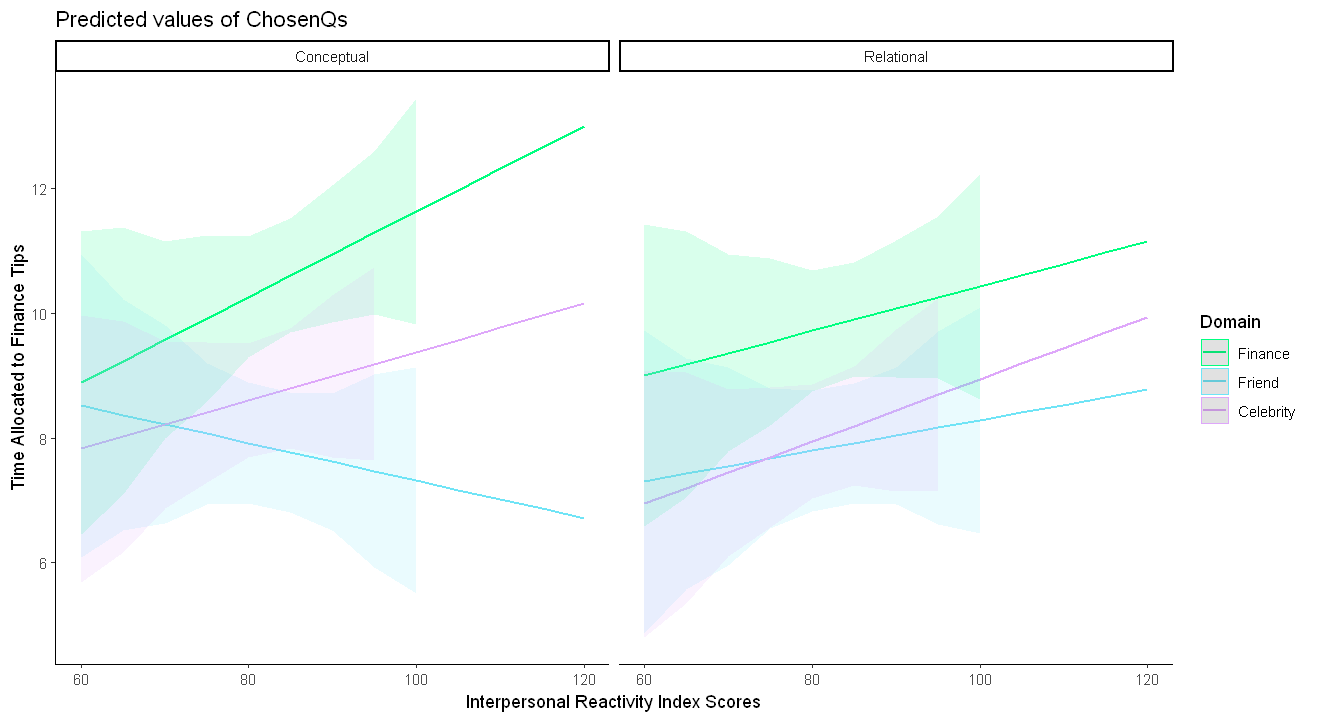

In [107]:
iri_FinTime <- lmer(ChosenQs ~ IRI.Total * TypeNameShown+ (1|PID), data=bdata)
summary(iri_FinTime)
iri_FinTime_int <- interact_plot(iri_FinTime, pred = IRI.Total, modx = TypeNameShown, x.label= "Interpersonal Reactivity Index Scores", y.label = "Amount of Time Chosen for Finance Tips", palette = c("#16F39B", "#3F9EFD", "#C681FC"), line.thickness = 1.5)
iri_FinTime_int + theme_classic() + scale_color_manual(values=c("#16F39B", "#3F9EFD", "#C681FC", "#FCABAB", "#A988BC","#4CC6A9"))  #this has kind of naked lines 

iri_FinTime2 <- lmer(ChosenQs ~ IRI.Total*Domain*Condition+ (1|PID), data=bdata)
summary(iri_FinTime2)
iri_FinTime_int2 <- interact_plot(iri_FinTime, pred = IRI.Total, modx = TypeNameShown, x.label= "Interpersonal Reactivity Index Scores", y.label = "Amount of Time Chosen for Finance Tips", palette = c("#16F39B", "#3F9EFD", "#C681FC"), line.thickness = 1.5)
iri_FinTime_int2 + theme_classic() + scale_color_manual(values=c("#16F39B", "#3F9EFD", "#C681FC", "#FCABAB", "#A988BC","#4CC6A9"))  #this has kind of naked lines 




p<-plot_model(iri_FinTime2, type = "pred", terms = c("IRI.Total", "Domain [Finance,Friend, Celebrity]", "Condition"))
p<-p + theme_classic() + scale_fill_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA", "#00FF80",  "#6FE4F6","#DEA7FA"))+ scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA", "#00FF80",  "#6FE4F6","#DEA7FA"))
p + ylab("Time Allocated to Finance Tips") + xlab("Interpersonal Reactivity Index Scores")

Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ DERS_total * TypeNameShown + (1 | PID)
   Data: bdata

REML criterion at convergence: 35200.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9329 -0.7095 -0.0209  0.7076  3.5219 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept)  9.817   3.133   
 Residual             21.288   4.614   
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                                     Estimate Std. Error t value
(Intercept)                          8.868876   1.592496   5.569
DERS_total                          -0.002120   0.019996  -0.106
TypeNameShownFriendName              1.074203   0.736959   1.458
TypeNameShownFinanceName             2.214432   0.710420   3.117
TypeNameShownFinanceWord             1.716815   0.710481   2.416
TypeNameShownFriendWord              0.312865   0.697923   0.448
TypeNameShownCelebWord               2.555688   0.711885   3.590
DERS_total:TypeNameShownFriend

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,2.542314336,3.797032523
.sigma,4.527844456,4.694527812
(Intercept),5.755476915,11.982214784
DERS_total,-0.041212244,0.036974351
TypeNameShownFriendName,-0.369167743,2.517658889
TypeNameShownFinanceName,0.822949687,3.605828822
TypeNameShownFinanceWord,0.325238295,3.108355557
TypeNameShownFriendWord,-1.054167911,1.679753732
TypeNameShownCelebWord,1.161376941,3.949993953
DERS_total:TypeNameShownFriendName,-0.038886981,-0.002972730


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ DERS_total * Domain * Condition + (1 | PID)
   Data: bdata

REML criterion at convergence: 35200.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9329 -0.7095 -0.0209  0.7076  3.5219 

Random effects:
 Groups   Name        Variance Std.Dev.
 PID      (Intercept)  9.817   3.133   
 Residual             21.288   4.614   
Number of obs: 5929, groups:  PID, 50

Fixed effects:
                                                Estimate Std. Error t value
(Intercept)                                    10.585691   1.590631   6.655
DERS_total                                      0.009607   0.019975   0.481
DomainCelebrity                                 0.838873   0.707681   1.185
DomainFriend                                   -1.403950   0.694137  -2.023
ConditionRelational                             0.497617   0.706245   0.705
DERS_total:DomainCelebrity                     -0.038843   0.008889  -4.370
DERS_total:Do

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


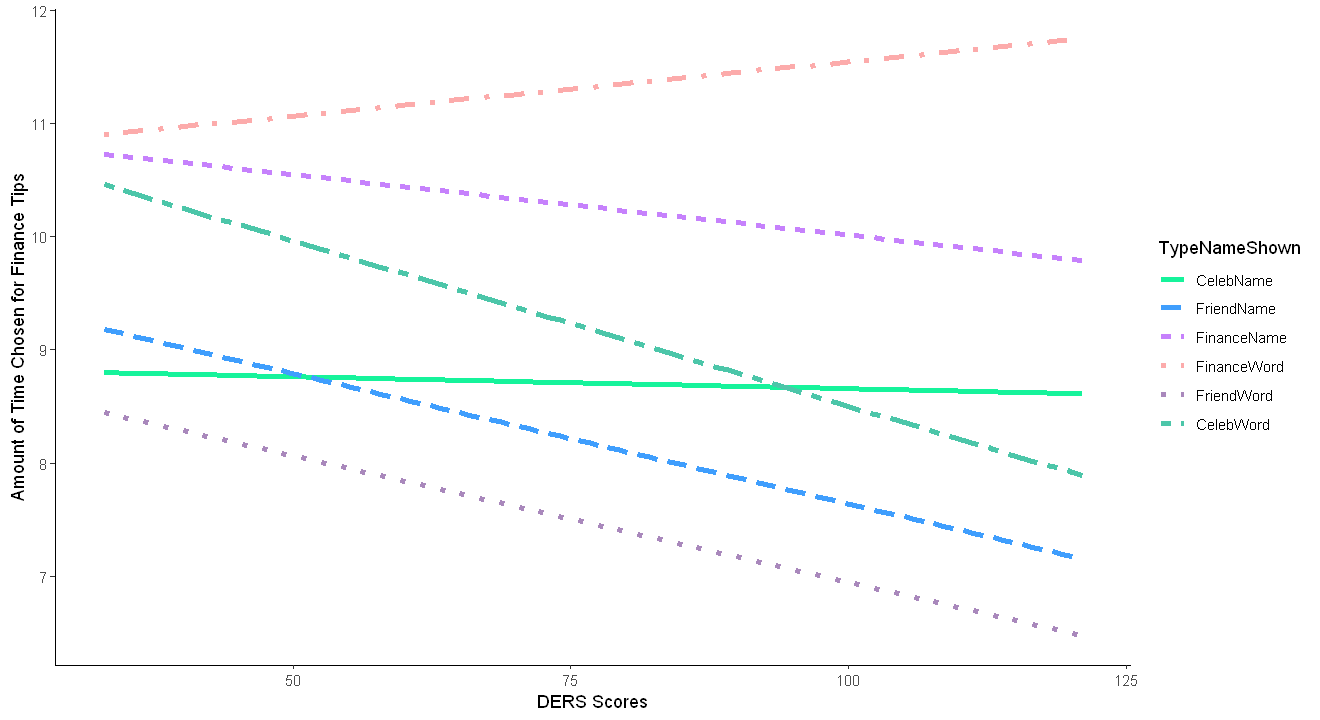

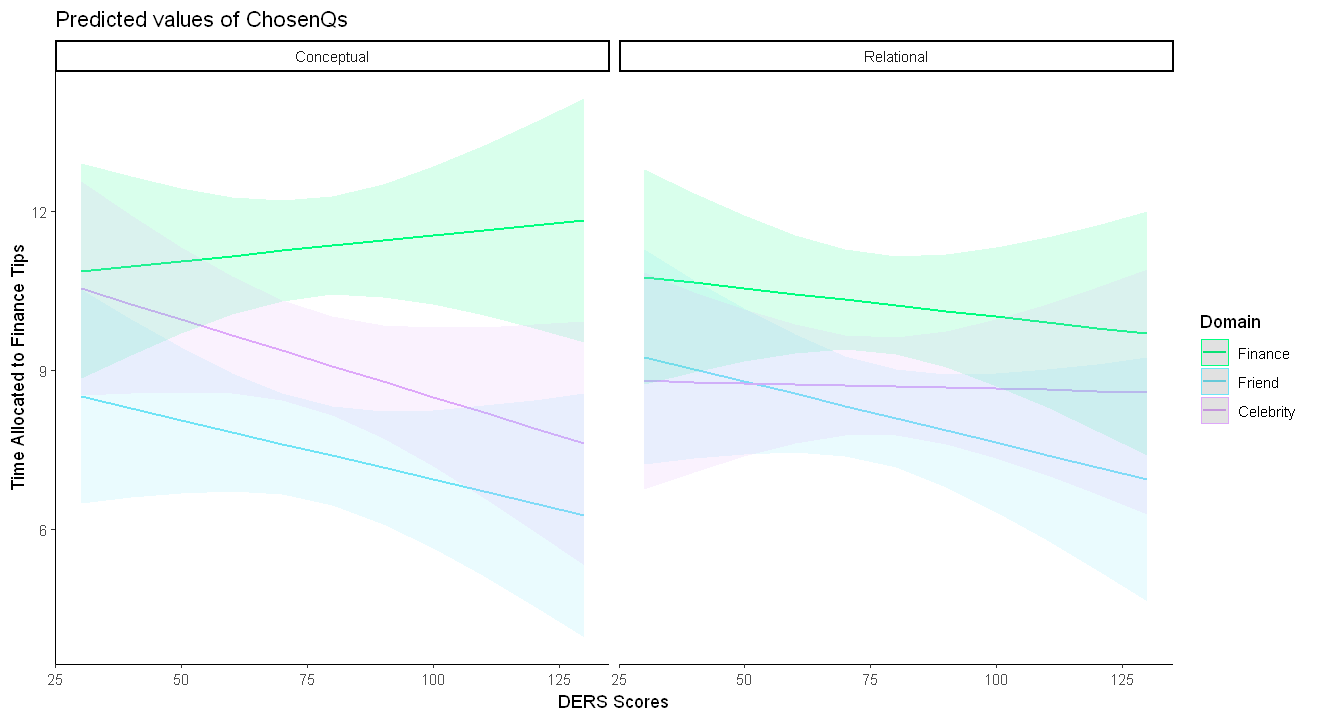

In [140]:
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "CelebWord")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FriendWord")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FriendName")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FinanceWord")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FinanceName")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "FriendName")
bdata$TypeNameShown <- relevel(bdata$TypeNameShown, ref = "CelebName")


ders_FinTime <- lmer(ChosenQs ~ DERS_total * TypeNameShown+ (1|PID), data=bdata)
summary(ders_FinTime)
confint(ders_FinTime)
ders_FinTime_int <- interact_plot(ders_FinTime, pred = DERS_total, modx = TypeNameShown, x.label= "DERS Scores", y.label = "Amount of Time Chosen for Finance Tips", palette = c("#16F39B", "#3F9EFD", "#C681FC"), line.thickness = 1.5)
ders_FinTime_int + theme_classic() + scale_color_manual(values=c("#16F39B", "#3F9EFD", "#C681FC", "#FCABAB", "#A988BC","#4CC6A9"))  #this has kind of naked lines 

ders_FinTime2 <- lmer(ChosenQs ~ DERS_total*Domain*Condition+ (1|PID), data=bdata)
summary(ders_FinTime2)

p<-plot_model(ders_FinTime2, type = "pred", terms = c("DERS_total", "Domain [Finance,Friend, Celebrity]", "Condition"))
p<-p + theme_classic() + scale_fill_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA", "#00FF80",  "#6FE4F6","#DEA7FA"))+ scale_color_manual(values=c("#00FF80",  "#6FE4F6","#DEA7FA", "#00FF80",  "#6FE4F6","#DEA7FA"))
p + ylab("Time Allocated to Finance Tips") + xlab("DERS Scores")

# Financial Social Sample


Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ DERS_total * TypeNameShownStr + (1 | SANPID)
   Data: finDataMain

REML criterion at convergence: 17467.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9006 -0.7401 -0.0326  0.7136  3.2449 

Random effects:
 Groups   Name        Variance Std.Dev.
 SANPID   (Intercept)  7.931   2.816   
 Residual             20.557   4.534   
Number of obs: 2950, groups:  SANPID, 50

Fixed effects:
                                    Estimate Std. Error t value
(Intercept)                         4.892882   1.566270   3.124
DERS_total                          0.038352   0.018841   2.036
TypeNameShownStrFinance            -0.098537   0.753640  -0.131
TypeNameShownStrFriend              0.214418   0.753528   0.285
DERS_total:TypeNameShownStrFinance  0.020576   0.009075   2.267
DERS_total:TypeNameShownStrFriend  -0.012314   0.009076  -1.357

Correlation of Fixed Effects:
                        (Intr) DERS_t TypNmShwnStrFn Typ

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,2.269976932,3.426712291
.sigma,4.416721293,4.650025593
(Intercept),1.830395625,7.955448325
DERS_total,0.001512246,0.075189323
TypeNameShownStrFinance,-1.574980101,1.378174325
TypeNameShownStrFriend,-1.261869576,1.690845095
DERS_total:TypeNameShownStrFinance,0.002793972,0.038354617
DERS_total:TypeNameShownStrFriend,-0.030098659,0.005467431


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


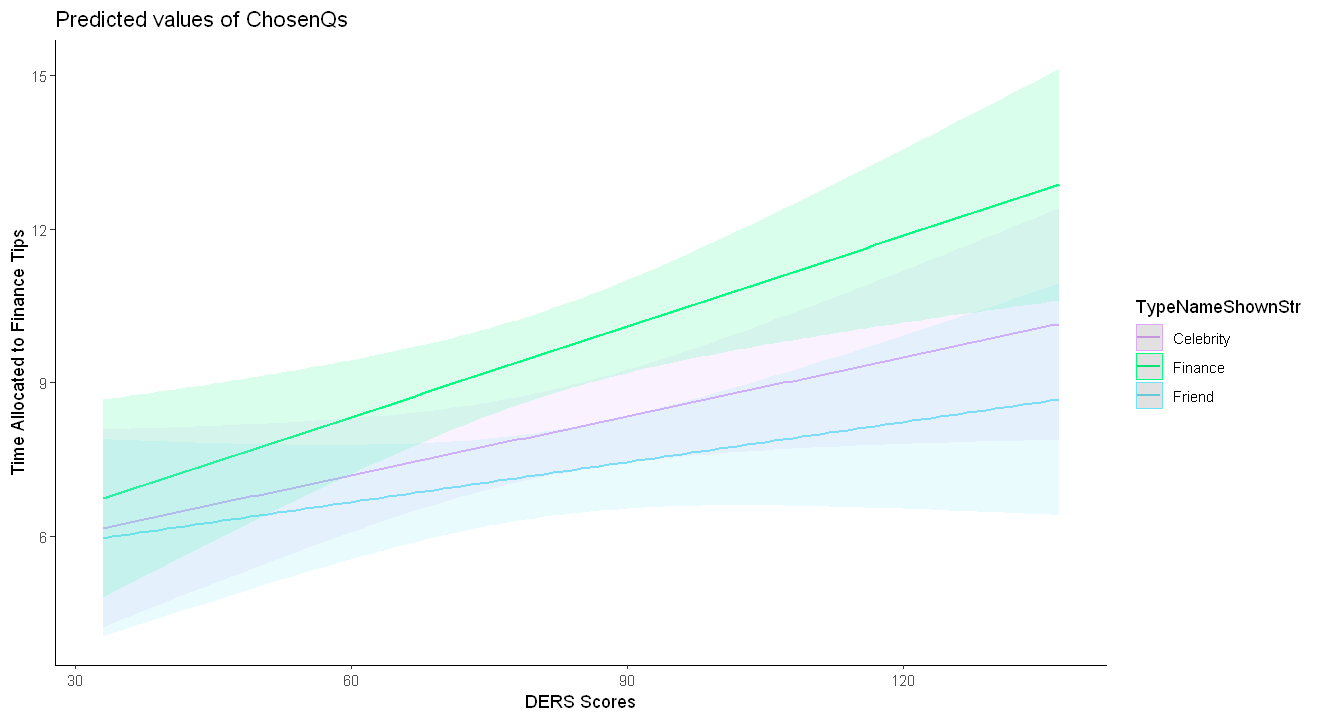

In [133]:
setwd("F://Moralizing Self-Regulation//Financial SelfReg Study//Name-Word Primes and Time Allocations//Main Sample-50//finance-game-selfreg-master//data")

finDataMain <- read.csv("BehavioralData_narm.csv")
finDataMain$TypeNameShownStr <- factor(finDataMain$TypeNameShownStr)
finDataMain$SANPID <- factor(finDataMain$SANPID)



In [134]:
finDataMain$TypeNameShownStr <- relevel(finDataMain$TypeNameShownStr, ref = "Celebrity")
finDataMain$TypeNameShownStr <- relevel(finDataMain$TypeNameShownStr, ref = "Friend")
finDataMain$TypeNameShownStr <- relevel(finDataMain$TypeNameShownStr, ref = "Finance")


Linear mixed model fit by REML ['lmerMod']
Formula: ChosenQs ~ DERS_total * TypeNameShownStr + (1 | SANPID)
   Data: finDataMain

REML criterion at convergence: 17467.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9006 -0.7401 -0.0326  0.7136  3.2449 

Random effects:
 Groups   Name        Variance Std.Dev.
 SANPID   (Intercept)  7.931   2.816   
 Residual             20.557   4.534   
Number of obs: 2950, groups:  SANPID, 50

Fixed effects:
                                      Estimate Std. Error t value
(Intercept)                           4.794345   1.567257   3.059
DERS_total                            0.058928   0.018848   3.126
TypeNameShownStrFriend                0.312955   0.755609   0.414
TypeNameShownStrCelebrity             0.098537   0.753640   0.131
DERS_total:TypeNameShownStrFriend    -0.032890   0.009092  -3.617
DERS_total:TypeNameShownStrCelebrity -0.020576   0.009075  -2.267

Correlation of Fixed Effects:
            (Intr) DERS_t TyNSSF TyNSSC DE

Computing profile confidence intervals ...


,2.5 %,97.5 %
.sig01,2.26997694,3.426712275
.sigma,4.41672129,4.650025593
(Intercept),1.72988513,7.858683697
DERS_total,0.02207484,0.095780371
TypeNameShownStrFriend,-1.16754453,1.793325831
TypeNameShownStrCelebrity,-1.37817433,1.574980101
DERS_total:TypeNameShownStrFriend,-0.05070438,-0.015075432
DERS_total:TypeNameShownStrCelebrity,-0.03835462,-0.002793972


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


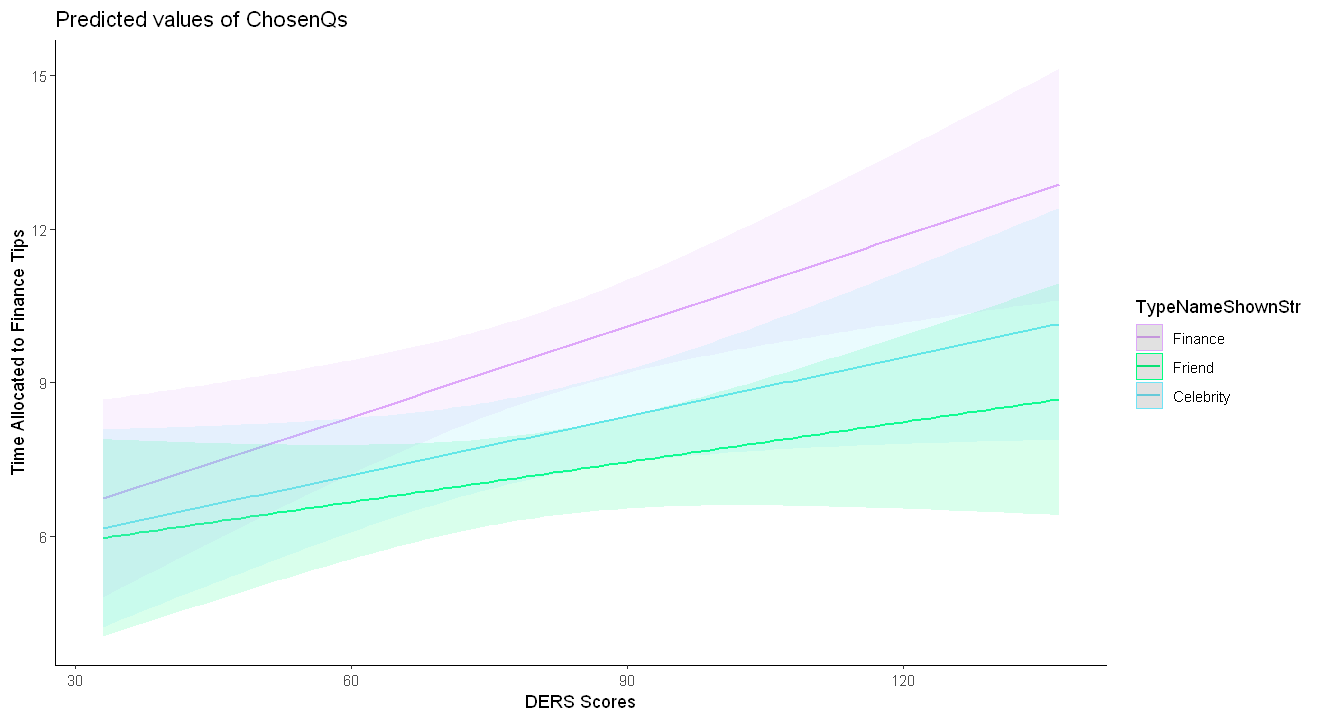

In [135]:
mlm_DER_Int <- lmer(ChosenQs~DERS_total*TypeNameShownStr + (1|SANPID), data=finDataMain)
summary(mlm_DER_Int)
confint(mlm_DER_Int)

ders_FinTime_int <- plot_model(mlm_DER_Int, type = "int")
ders_FinTime_int <- ders_FinTime_int + theme_classic() + scale_fill_manual(values=c("#DEA7FA", "#00FF80", "#6FE4F6"))+ scale_color_manual(values=c("#DEA7FA", "#00FF80", "#6FE4F6")) 
ders_FinTime_int + ylab("Time Allocated to Finance Tips") + xlab("DERS Scores")